In [2]:
import numpy as np
import pandas as pd
import math
from scipy.stats import norm, skew
from scipy import stats

# Modelling Algorithms :

# Classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis , QuadraticDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

# Regression
from sklearn.linear_model import LinearRegression,Ridge,Lasso,RidgeCV, ElasticNet
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor

# Modelling Helpers :
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.preprocessing import Imputer , Normalizer , scale
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFECV
from sklearn.model_selection import GridSearchCV , KFold , cross_val_score

#preprocessing :
from sklearn.preprocessing import MinMaxScaler , StandardScaler, Imputer, LabelEncoder


#evaluation metrics :

# Regression
from sklearn.metrics import mean_squared_log_error,mean_squared_error, r2_score,mean_absolute_error 

# Classification
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score  
from sklearn.metrics import confusion_matrix, classification_report


# Visualisation
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

# Configure visualisations
%matplotlib inline
mpl.style.use( 'ggplot' )
plt.style.use('fivethirtyeight')
sns.set(context="notebook", palette="dark", style = 'whitegrid' , color_codes=True)
params = { 
    'axes.labelsize': "large",
    'xtick.labelsize': 'x-large',
    'legend.fontsize': 20,
    'figure.dpi': 150,
    'figure.figsize': [25, 7]
}
plt.rcParams.update(params)

### Data Collection

In [3]:
# Import data and explore it
df = pd.read_csv('AppleStore.csv')

df.head()

,Unnamed: 0,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,1,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1
1,2,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1
2,3,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1
3,4,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,1
4,5,282935706,Bible,92774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1


In [4]:
#description of variables
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7197 entries, 0 to 7196
Data columns (total 17 columns):
Unnamed: 0          7197 non-null int64
id                  7197 non-null int64
track_name          7197 non-null object
size_bytes          7197 non-null int64
currency            7197 non-null object
price               7197 non-null float64
rating_count_tot    7197 non-null int64
rating_count_ver    7197 non-null int64
user_rating         7197 non-null float64
user_rating_ver     7197 non-null float64
ver                 7197 non-null object
cont_rating         7197 non-null object
prime_genre         7197 non-null object
sup_devices.num     7197 non-null int64
ipadSc_urls.num     7197 non-null int64
lang.num            7197 non-null int64
vpp_lic             7197 non-null int64
dtypes: float64(3), int64(9), object(5)
memory usage: 955.9+ KB
None


In [5]:
#Unique values in each column
print(df.nunique())

Unnamed: 0          7197
id                  7197
track_name          7195
size_bytes          7107
currency               1
price                 36
rating_count_tot    3185
rating_count_ver    1138
user_rating           10
user_rating_ver       10
ver                 1590
cont_rating            4
prime_genre           23
sup_devices.num       20
ipadSc_urls.num        6
lang.num              57
vpp_lic                2
dtype: int64


### Data Preprocessing and Exploratory Data Analysis

In [6]:
#check missing values
print('Missing Values:\n', df.isnull().sum().sort_values(ascending=False))

Missing Values:
 vpp_lic             0
rating_count_ver    0
id                  0
track_name          0
size_bytes          0
currency            0
price               0
rating_count_tot    0
user_rating         0
lang.num            0
user_rating_ver     0
ver                 0
cont_rating         0
prime_genre         0
sup_devices.num     0
ipadSc_urls.num     0
Unnamed: 0          0
dtype: int64


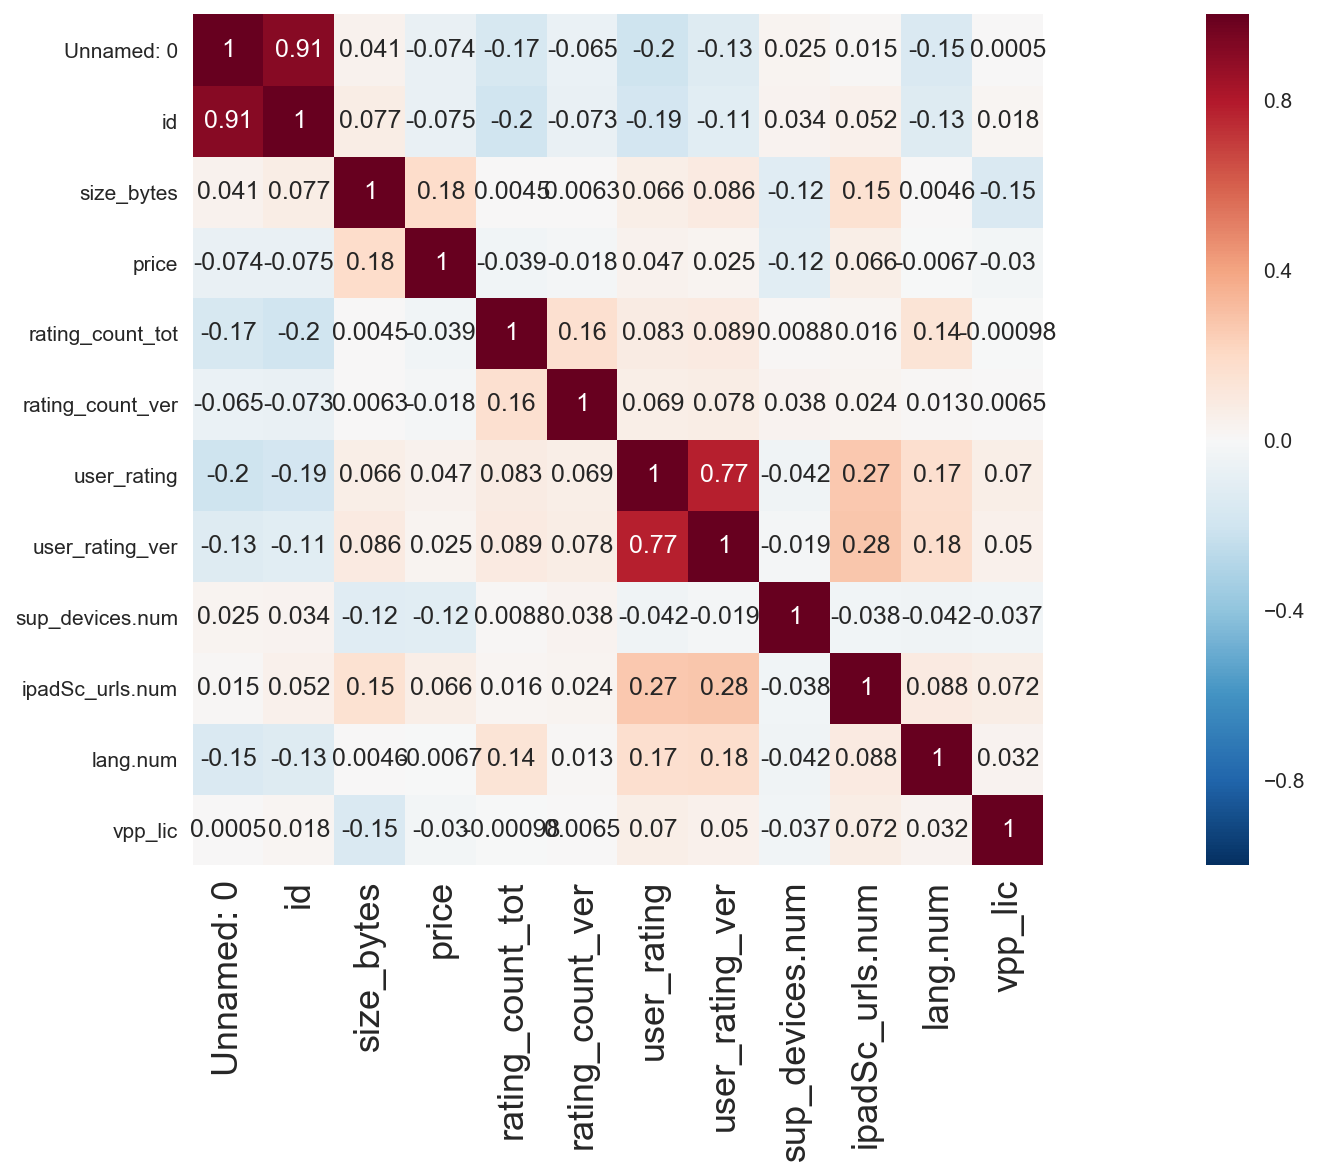

In [7]:
corr = df.corr()
sns.heatmap(data=corr, square=True , annot=True, cbar=True)
plt.show()

In [8]:
#removed columns Unnamed:0, id, track_name, currency, user_rating_ver, ver
df.drop(df.columns[[0,1,2,4,9,10]], axis=1, inplace=True)

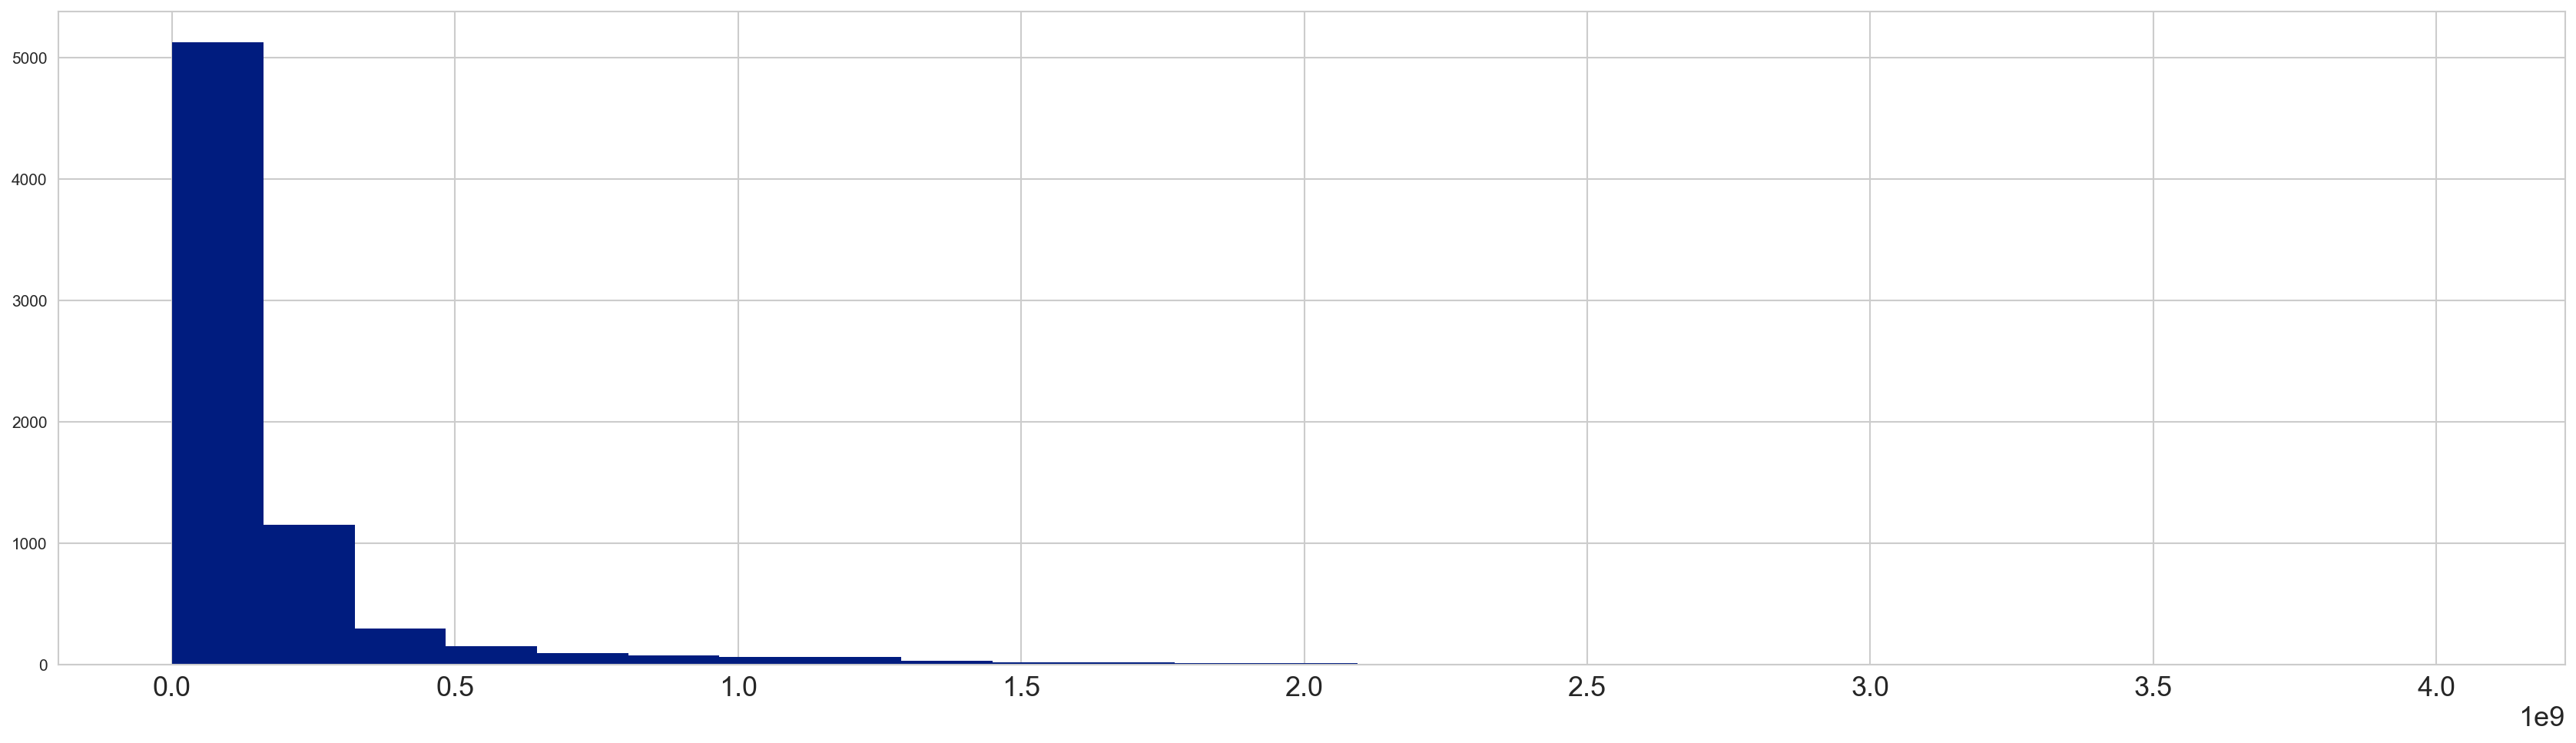

In [10]:
# 1 size_byte
plt.hist('size_bytes' , data=df , bins=25)

plt.show()
# Take nature log to deal with the skewness

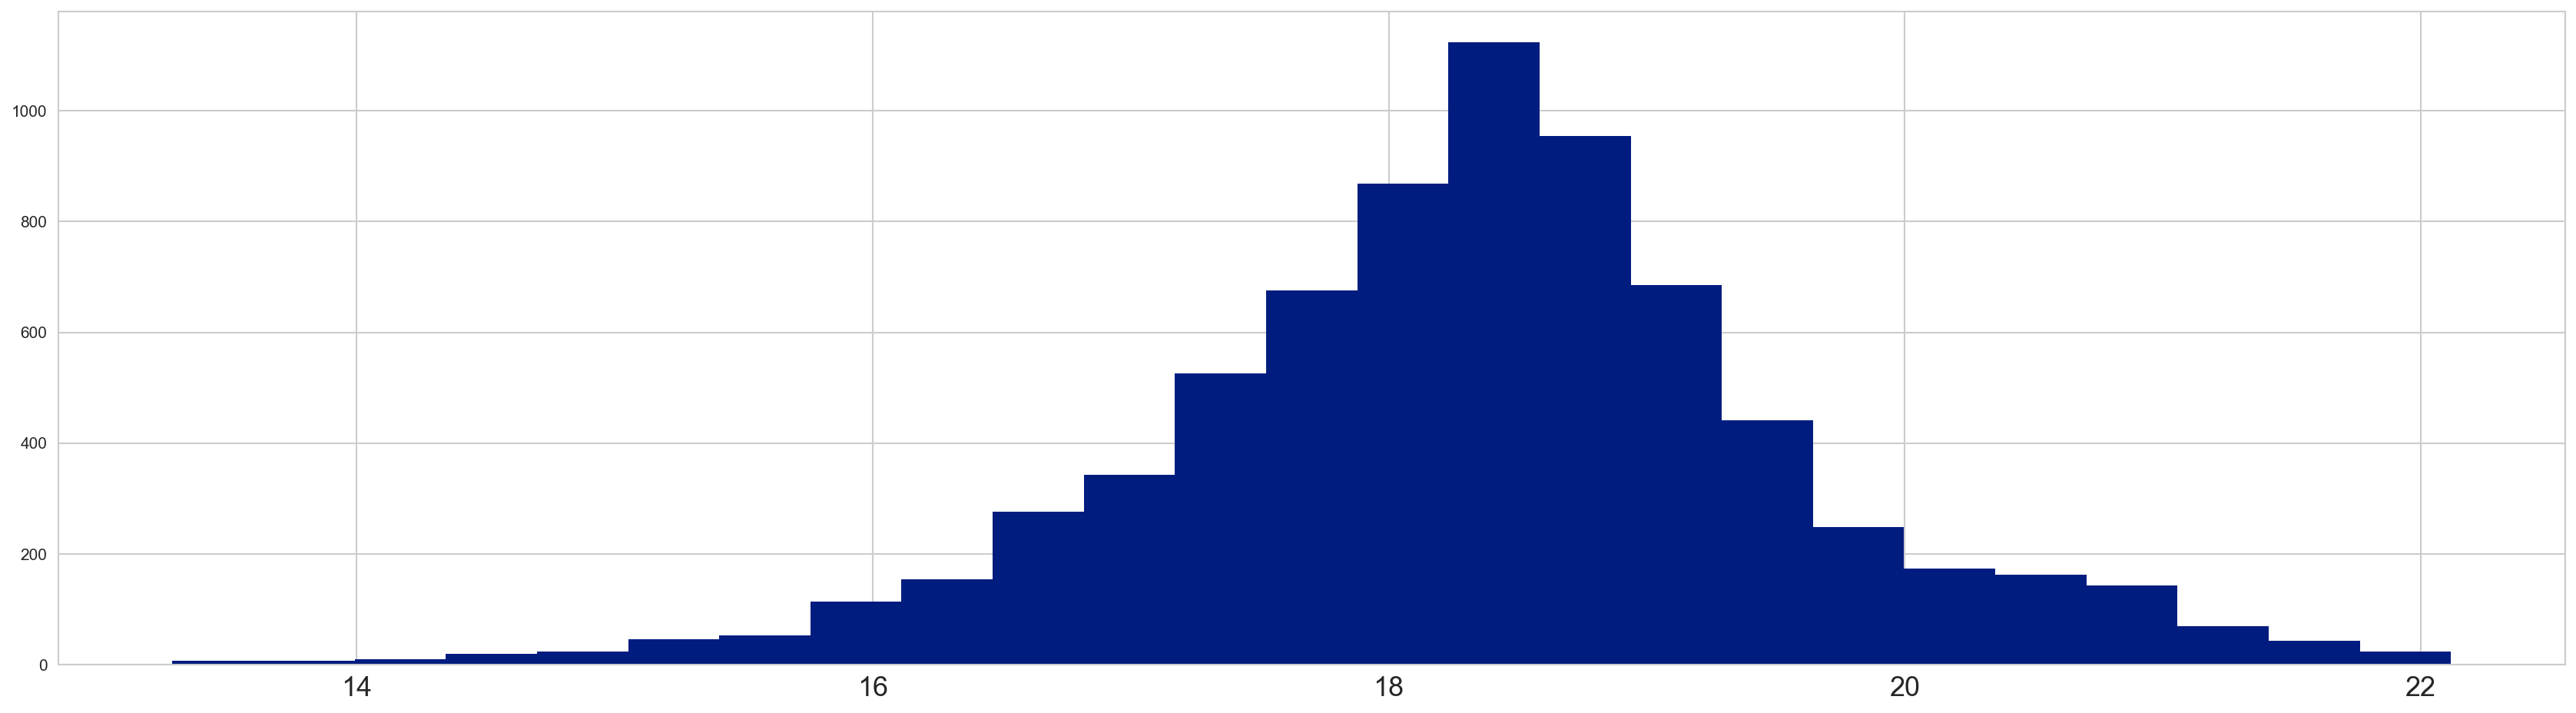

In [11]:
# Take nature log to deal with skewness
df["size_bytes"] = np.log(df["size_bytes"]+1)
plt.hist('size_bytes' , data=df , bins=25)
plt.show()

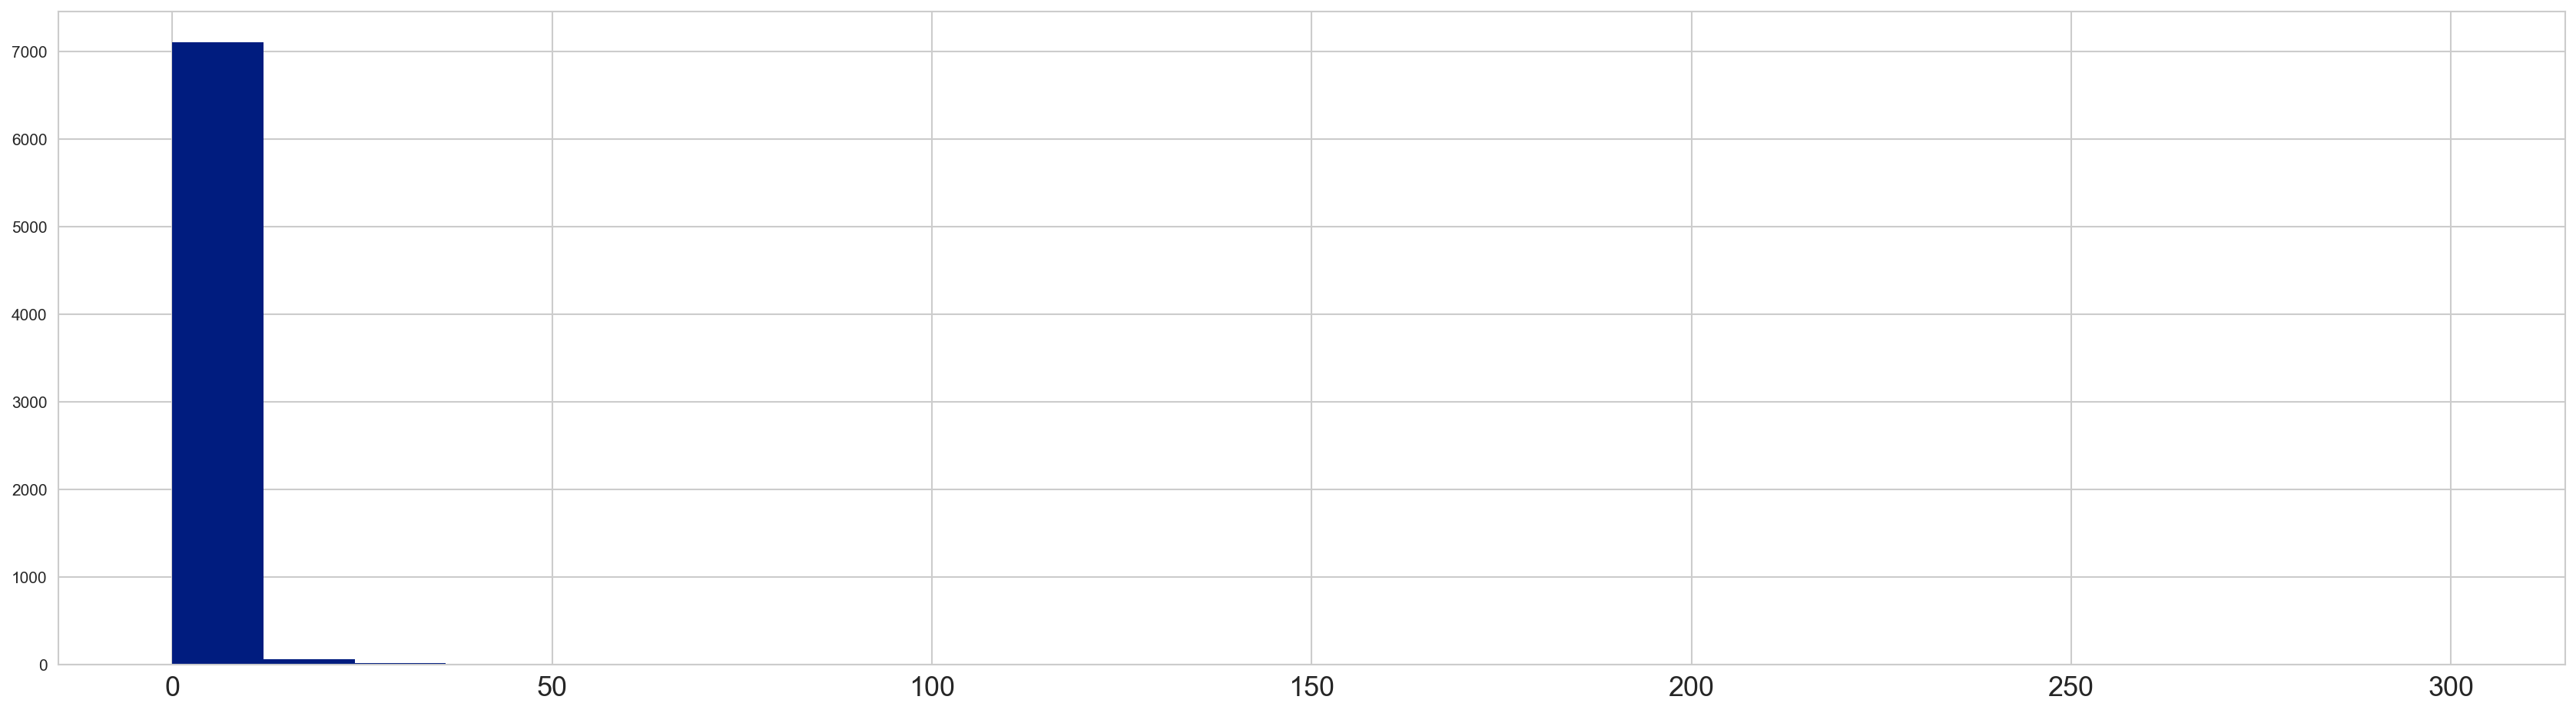

In [12]:
# 2 price
plt.hist('price' , data=df , bins=25)
plt.show()

In [13]:
# change to categorical veriable, whether the app the free?
df['price'] = [1 if x == 0 else 0 for x in df['price']]
# whether app is free, 1 indicate is free, 0 indicate the app is not free
df.head()

,size_bytes,price,rating_count_tot,rating_count_ver,user_rating,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,18.428532,0,21292,26,4.0,4+,Games,38,5,10,1
1,18.881761,1,161065,26,4.0,4+,Productivity,37,5,23,1
2,18.425907,1,188583,2822,3.5,4+,Weather,37,5,3,1
3,18.671533,1,262241,649,4.0,12+,Shopping,37,5,9,1
4,18.345681,1,985920,5320,4.5,4+,Reference,37,5,45,1


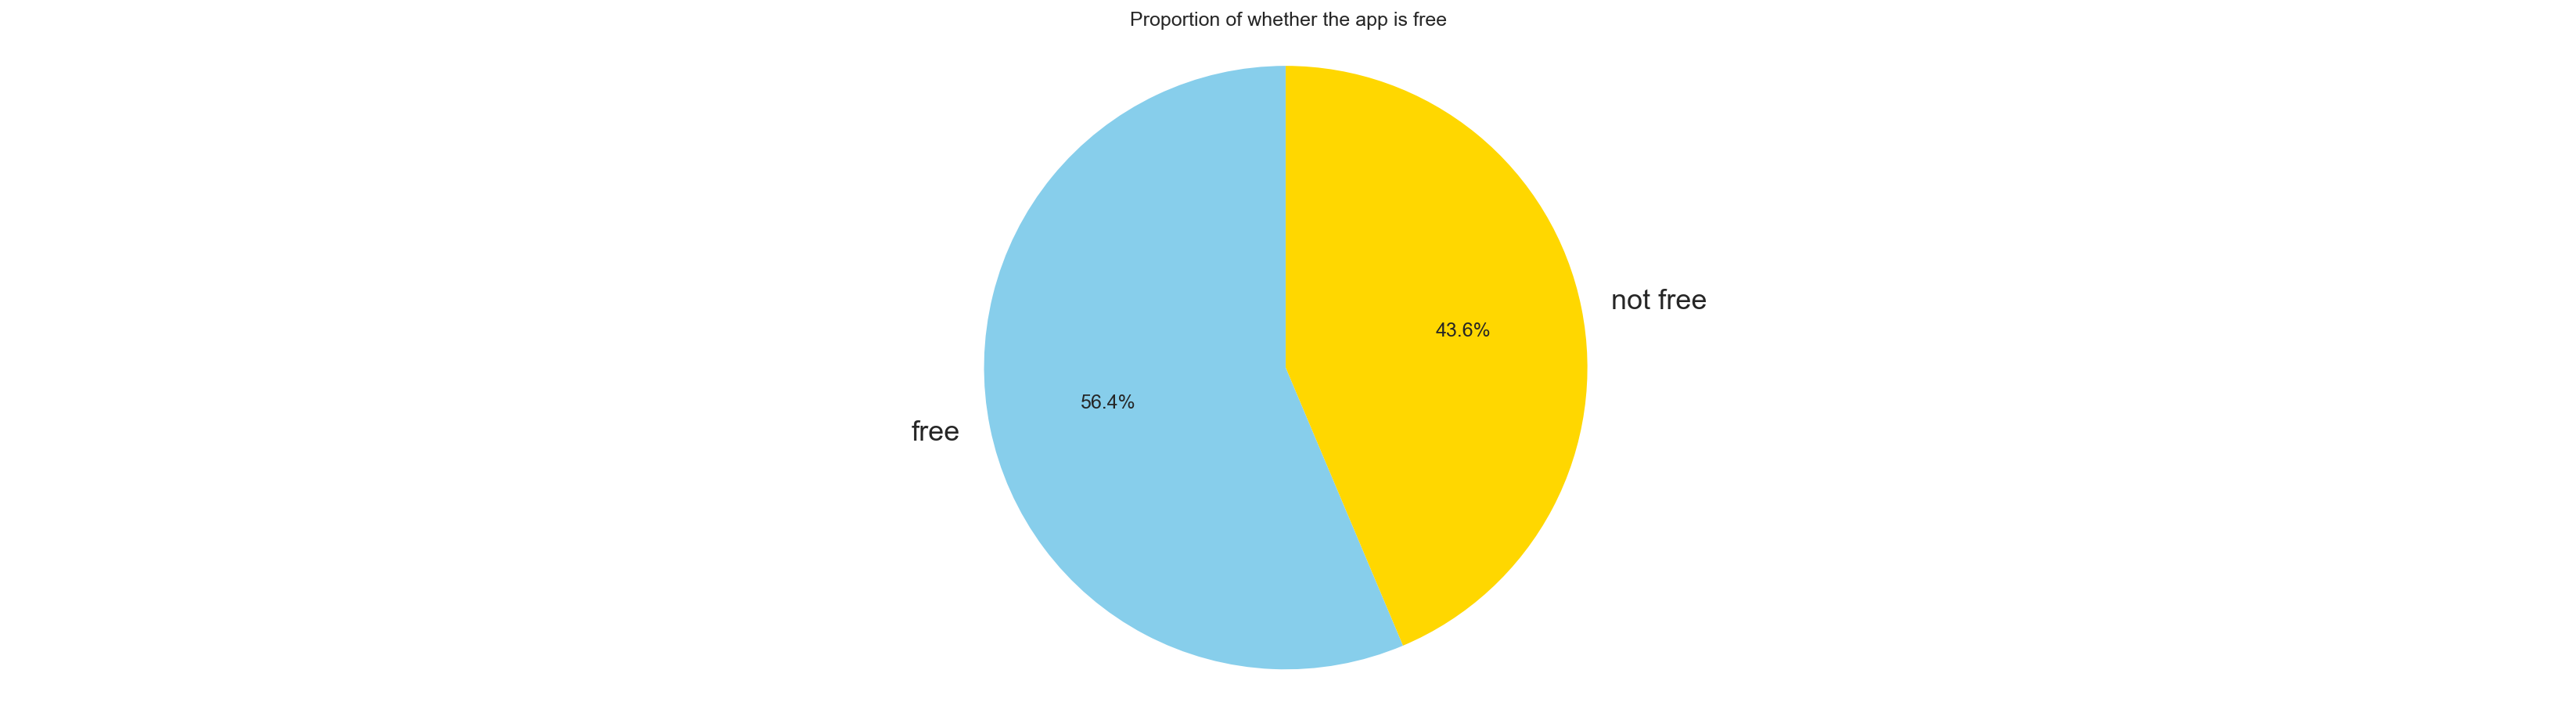

In [14]:
#pie chart for free and non-free apps
free = list(df['price'])
isfree = free.count(1)
notfree = free.count(0)
sizes = [isfree,notfree]
labels = ['free','not free']
colors = ['skyblue','gold']
plt.title('Proportion of whether the app is free')
plt.pie(sizes, labels=labels, colors=colors,autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.show()

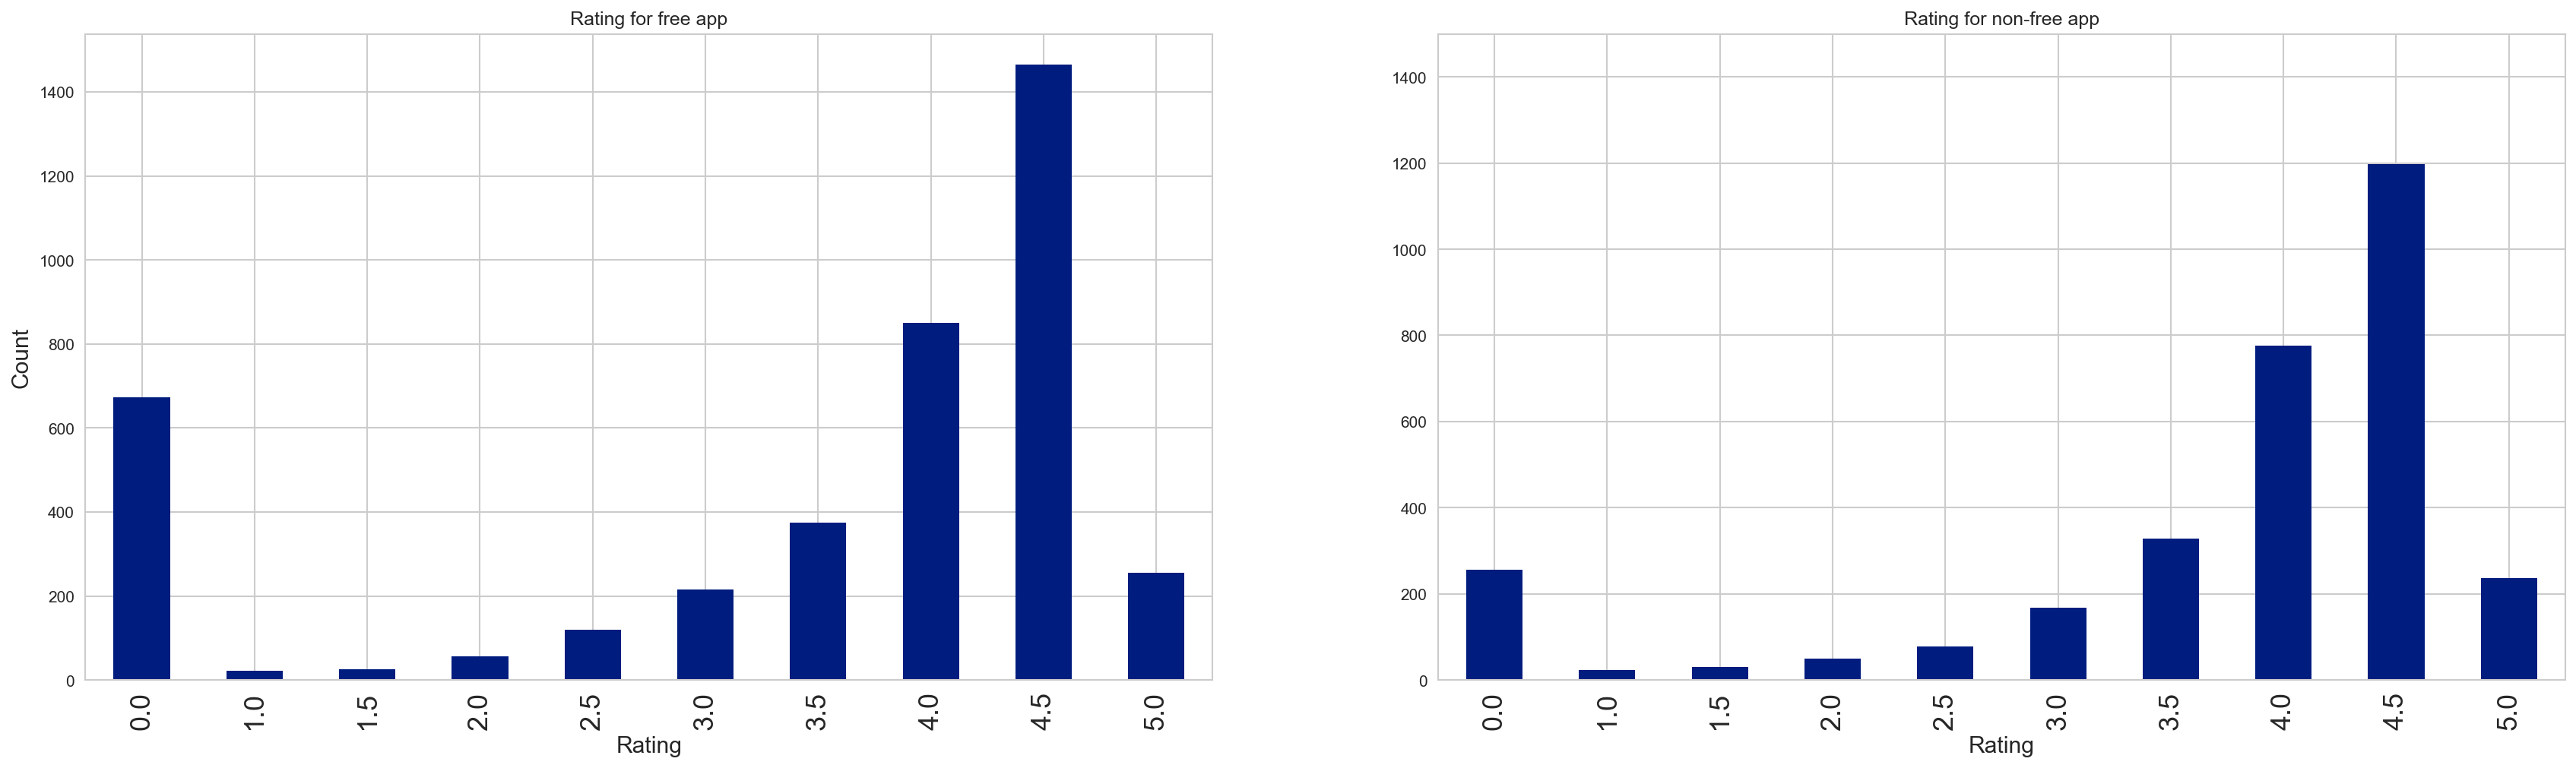

In [15]:
#bar chart for free/non-free versus user_rating
free = df[df['price']==1]
non_free = df[df['price']==0]

plt.subplot(1, 2, 1)
free['user_rating'].value_counts().sort_index().plot.bar()
plt.title('Rating for free app')
plt.xlabel('Rating')
plt.ylabel('Count')


plt.subplot(1, 2, 2)
non_free['user_rating'].value_counts().sort_index().plot.bar()
plt.title('Rating for non-free app')
plt.xlabel('Rating')
plt.ylim(ymax=1500, ymin=0)


plt.show()

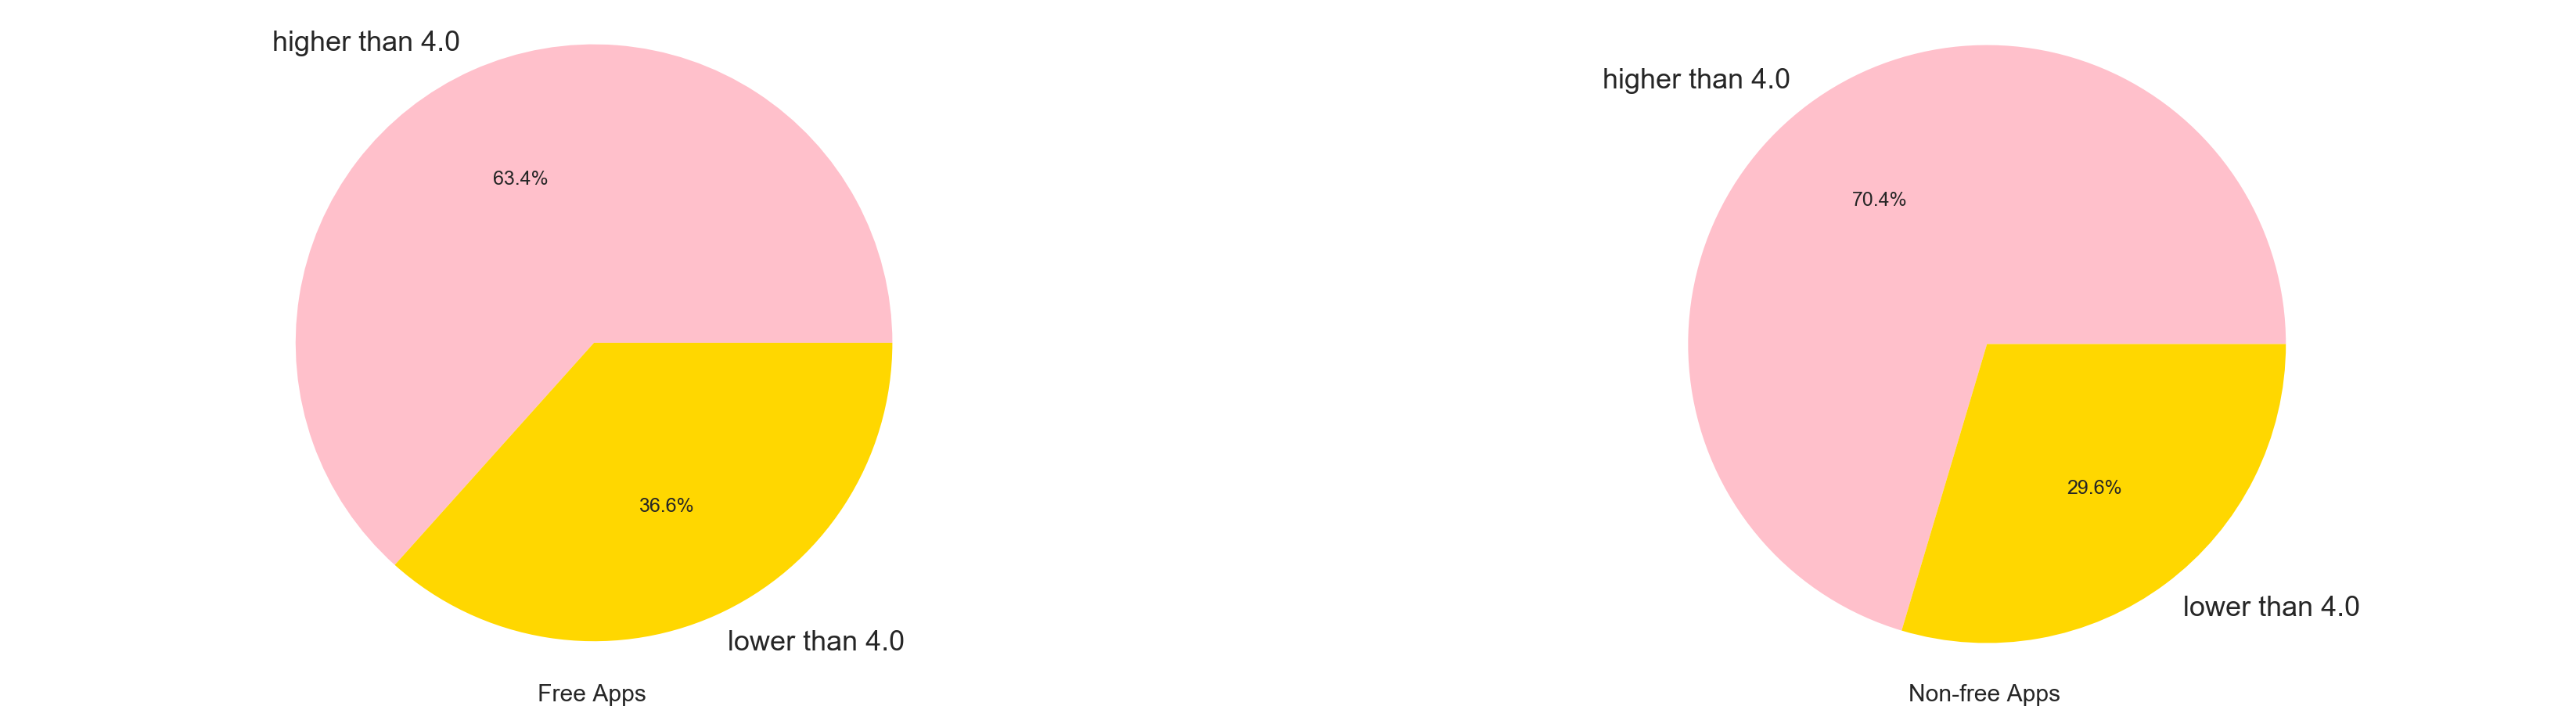

In [16]:
#pie chart of free/non-free versus user_rating
plt.subplot(1,2,1)
f_hr = free[free['user_rating']>=4.0]
f_lr = free[free['user_rating']<4.0]
size_f = [len(f_hr),len(f_lr)]
label_f = ['higher than 4.0','lower than 4.0']
colors = ['pink','gold']
plt.pie(size_f,labels=label_f,colors=colors,autopct='%1.1f%%')
plt.axis('equal')
plt.xlabel('Free Apps')

plt.subplot(1,2,2)
nf_hr = non_free[non_free['user_rating']>=4.0]
nf_lr = non_free[non_free['user_rating']<4.0]
size_nf = [len(nf_hr),len(nf_lr)]
label_nf = ['higher than 4.0','lower than 4.0']
colors = ['pink','gold']
plt.pie(size_nf,labels=label_nf,colors=colors,autopct='%1.1f%%')
plt.axis('equal')
plt.xlabel('Non-free Apps')

plt.show()

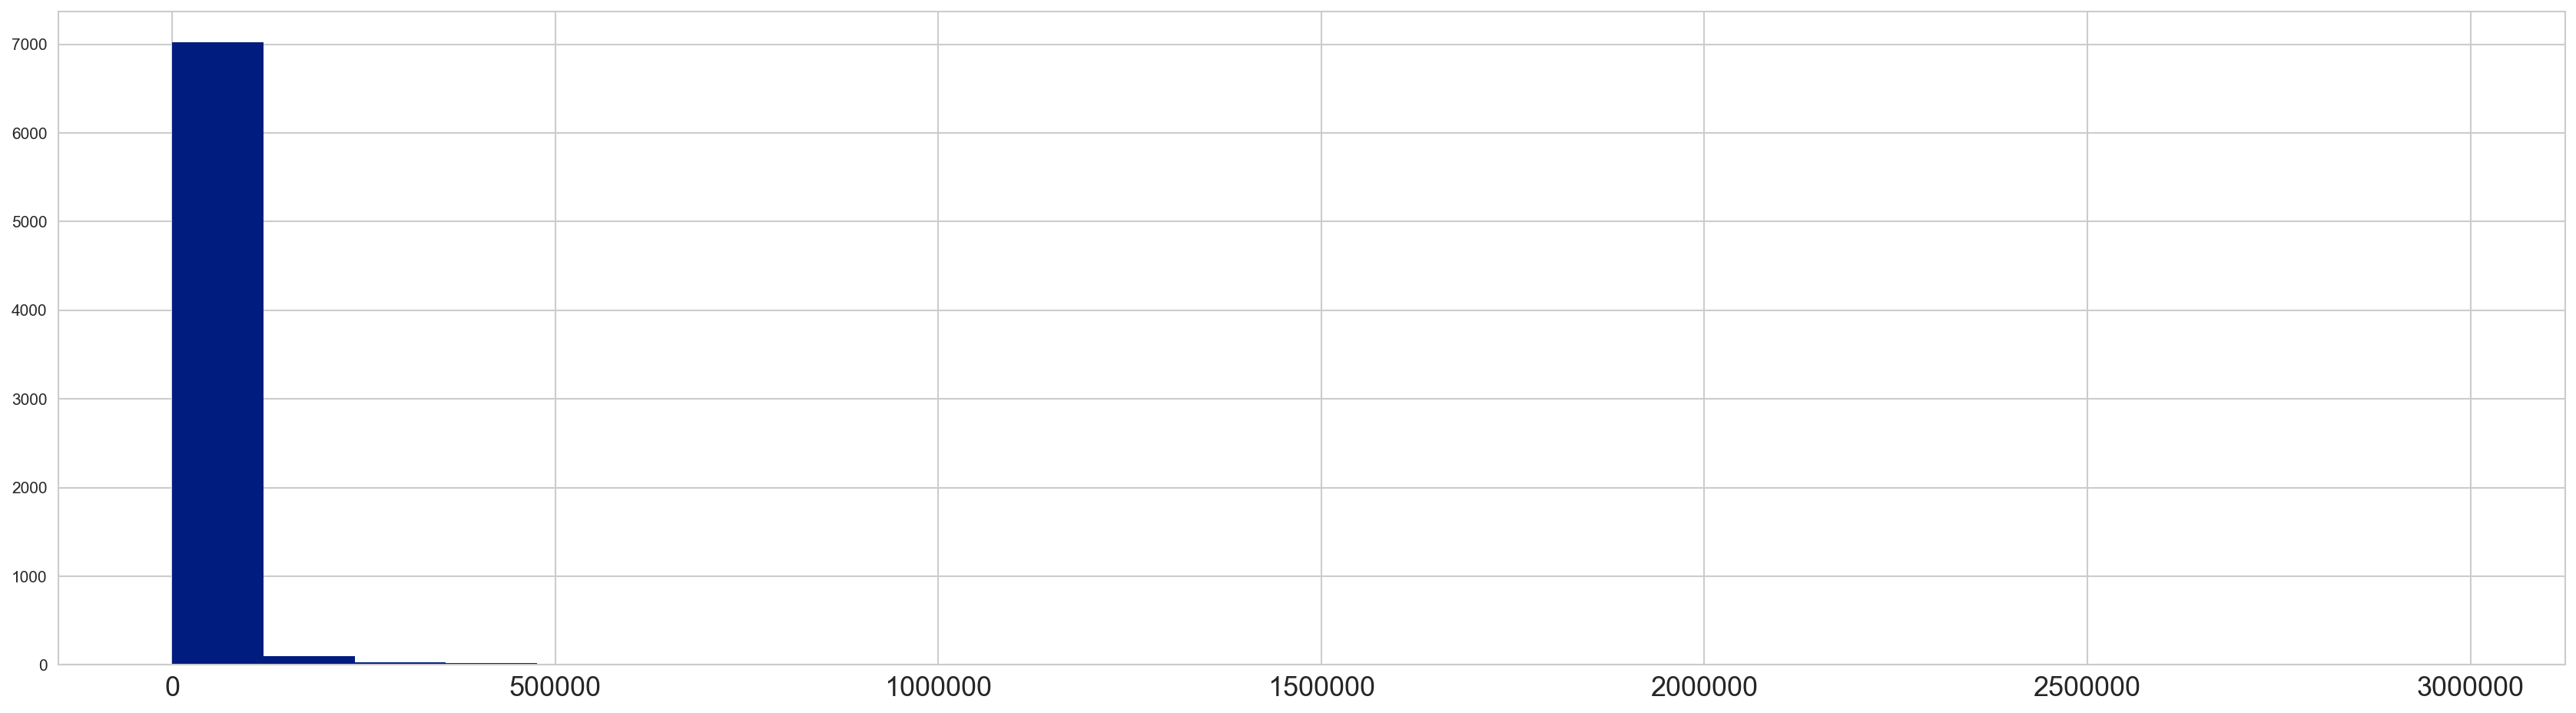

In [17]:
# 3 rating_count_tot
plt.hist('rating_count_tot' , data=df , bins=25)
plt.show()
# Take nature log to deal with the skewness

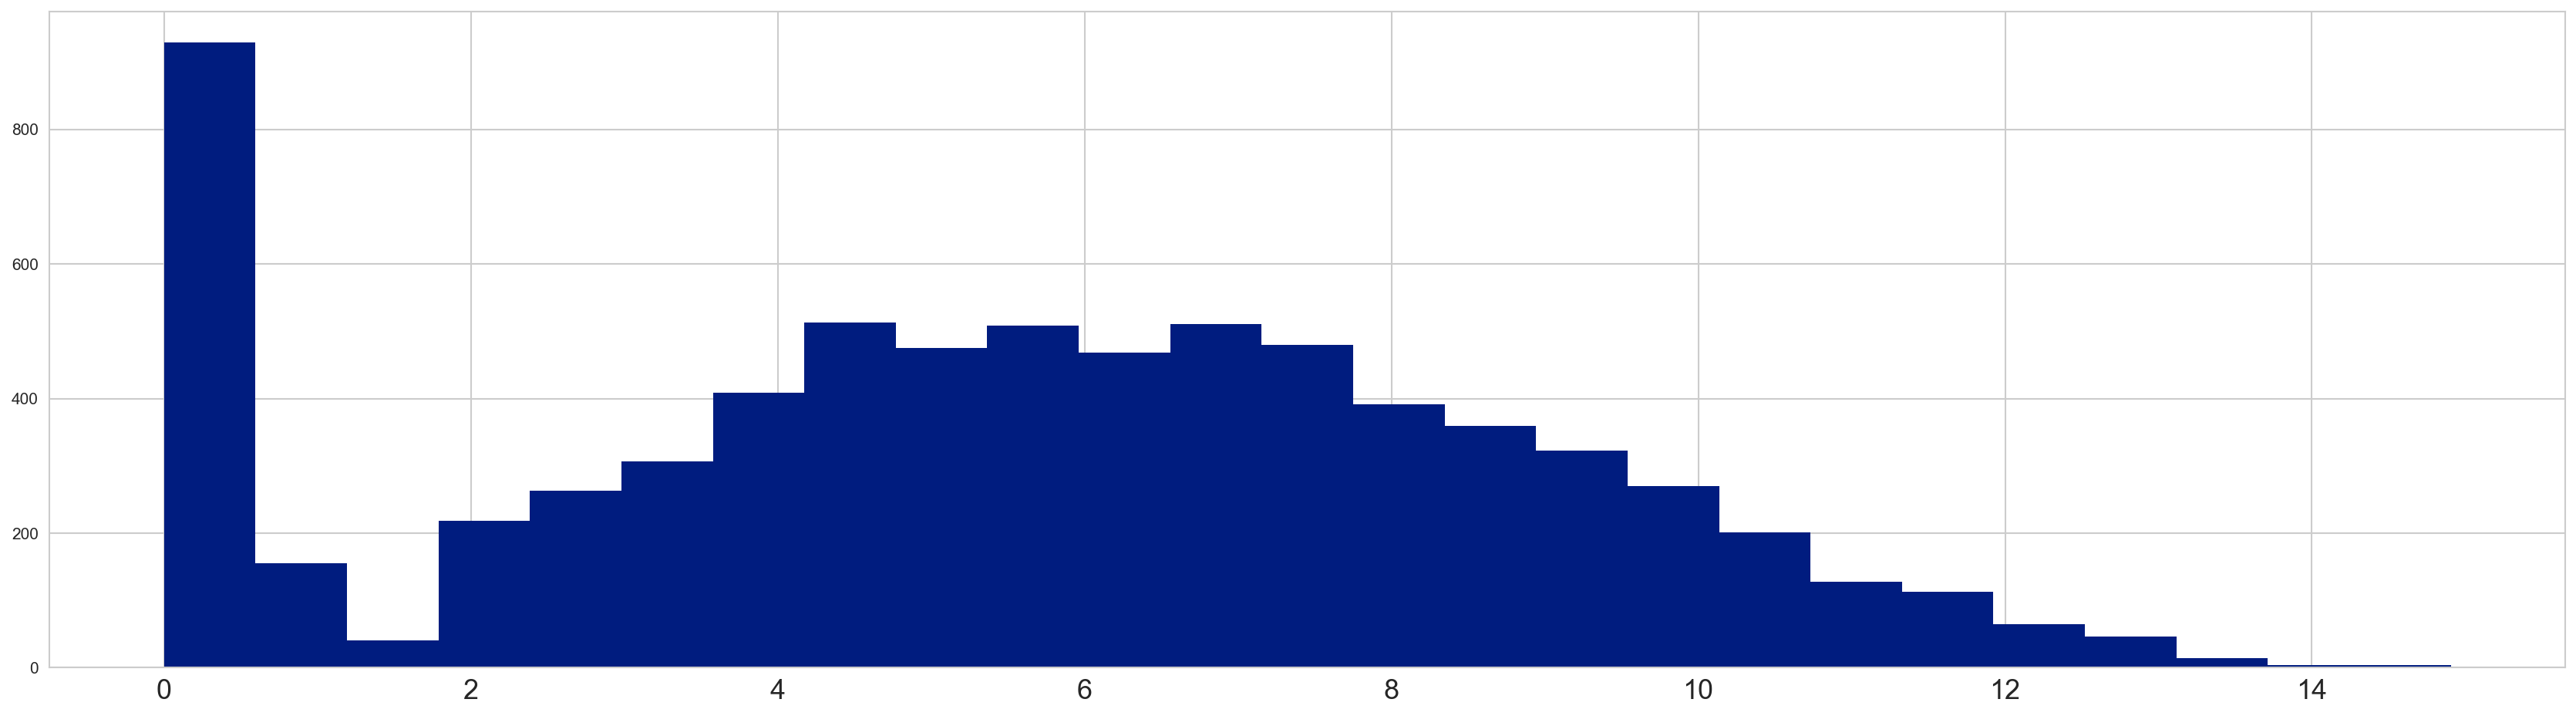

In [18]:
# Take nature log to deal with the skewness
df["rating_count_tot"] = np.log(df["rating_count_tot"]+1)
plt.hist('rating_count_tot' , data=df , bins=25)
plt.show()

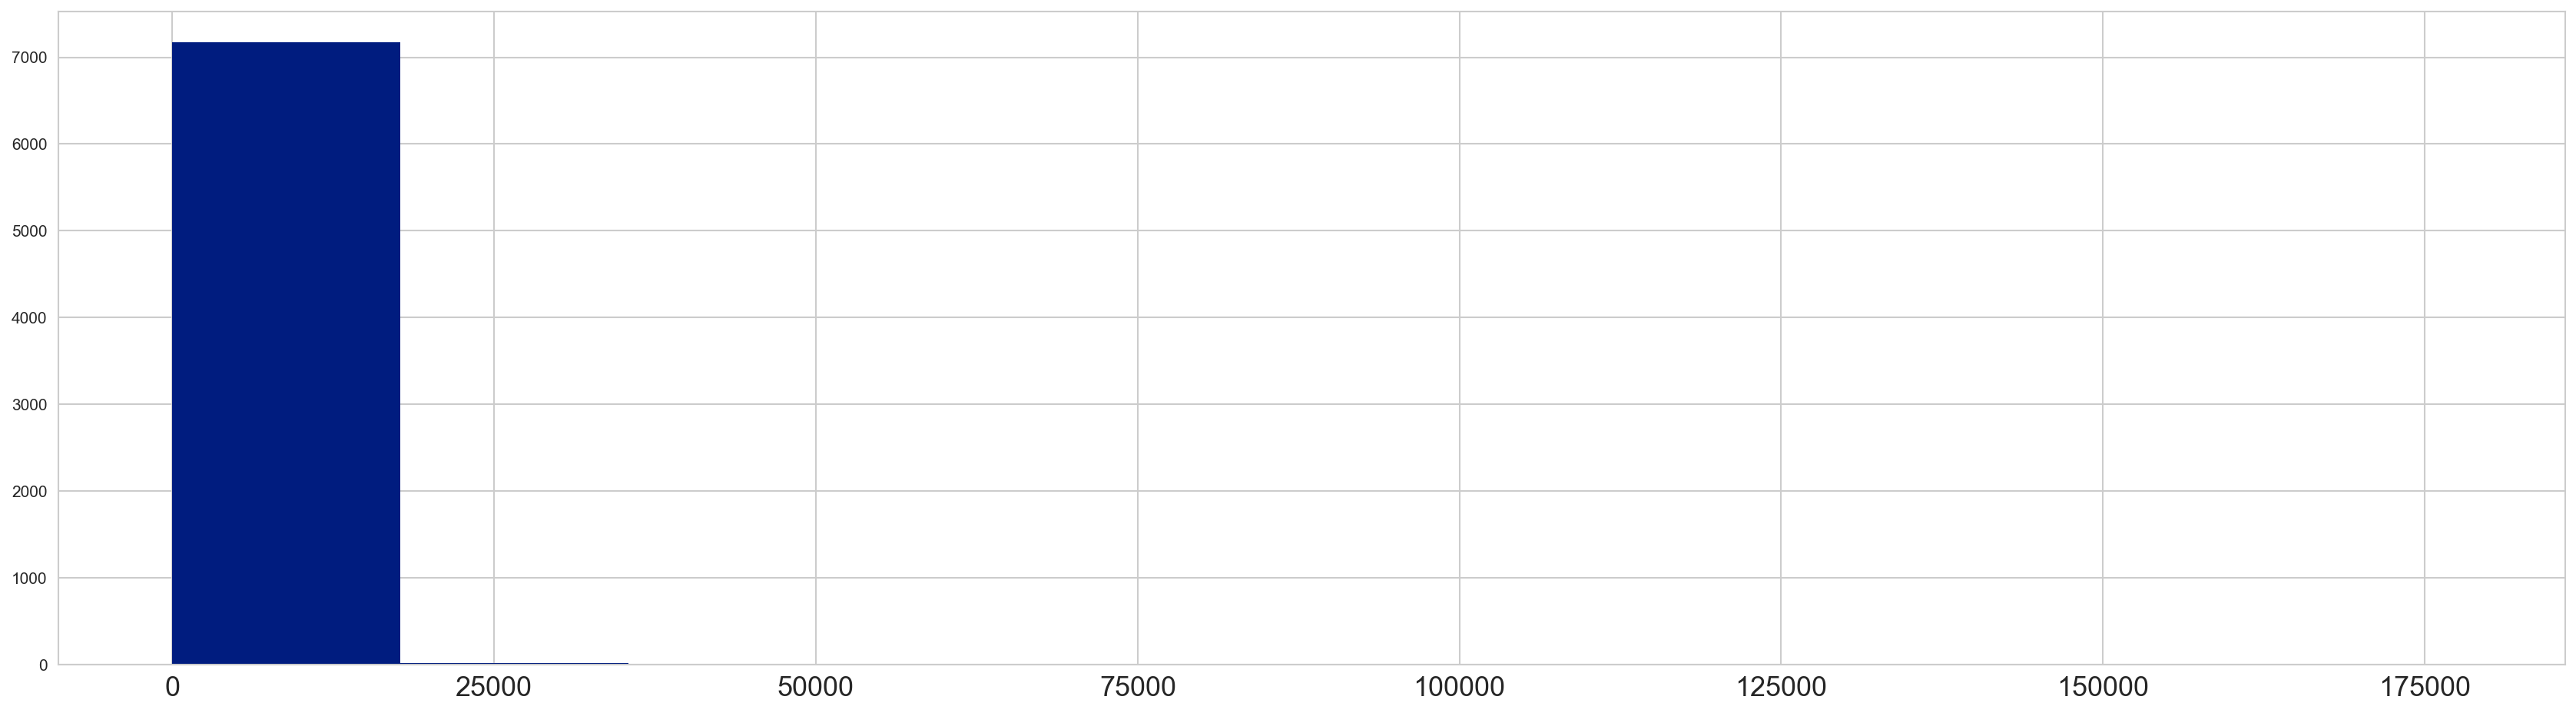

In [19]:
# 4 rating_count_ver
plt.hist('rating_count_ver' , data=df , bins=10)
plt.show()
# Take nature log to deal with the skewness

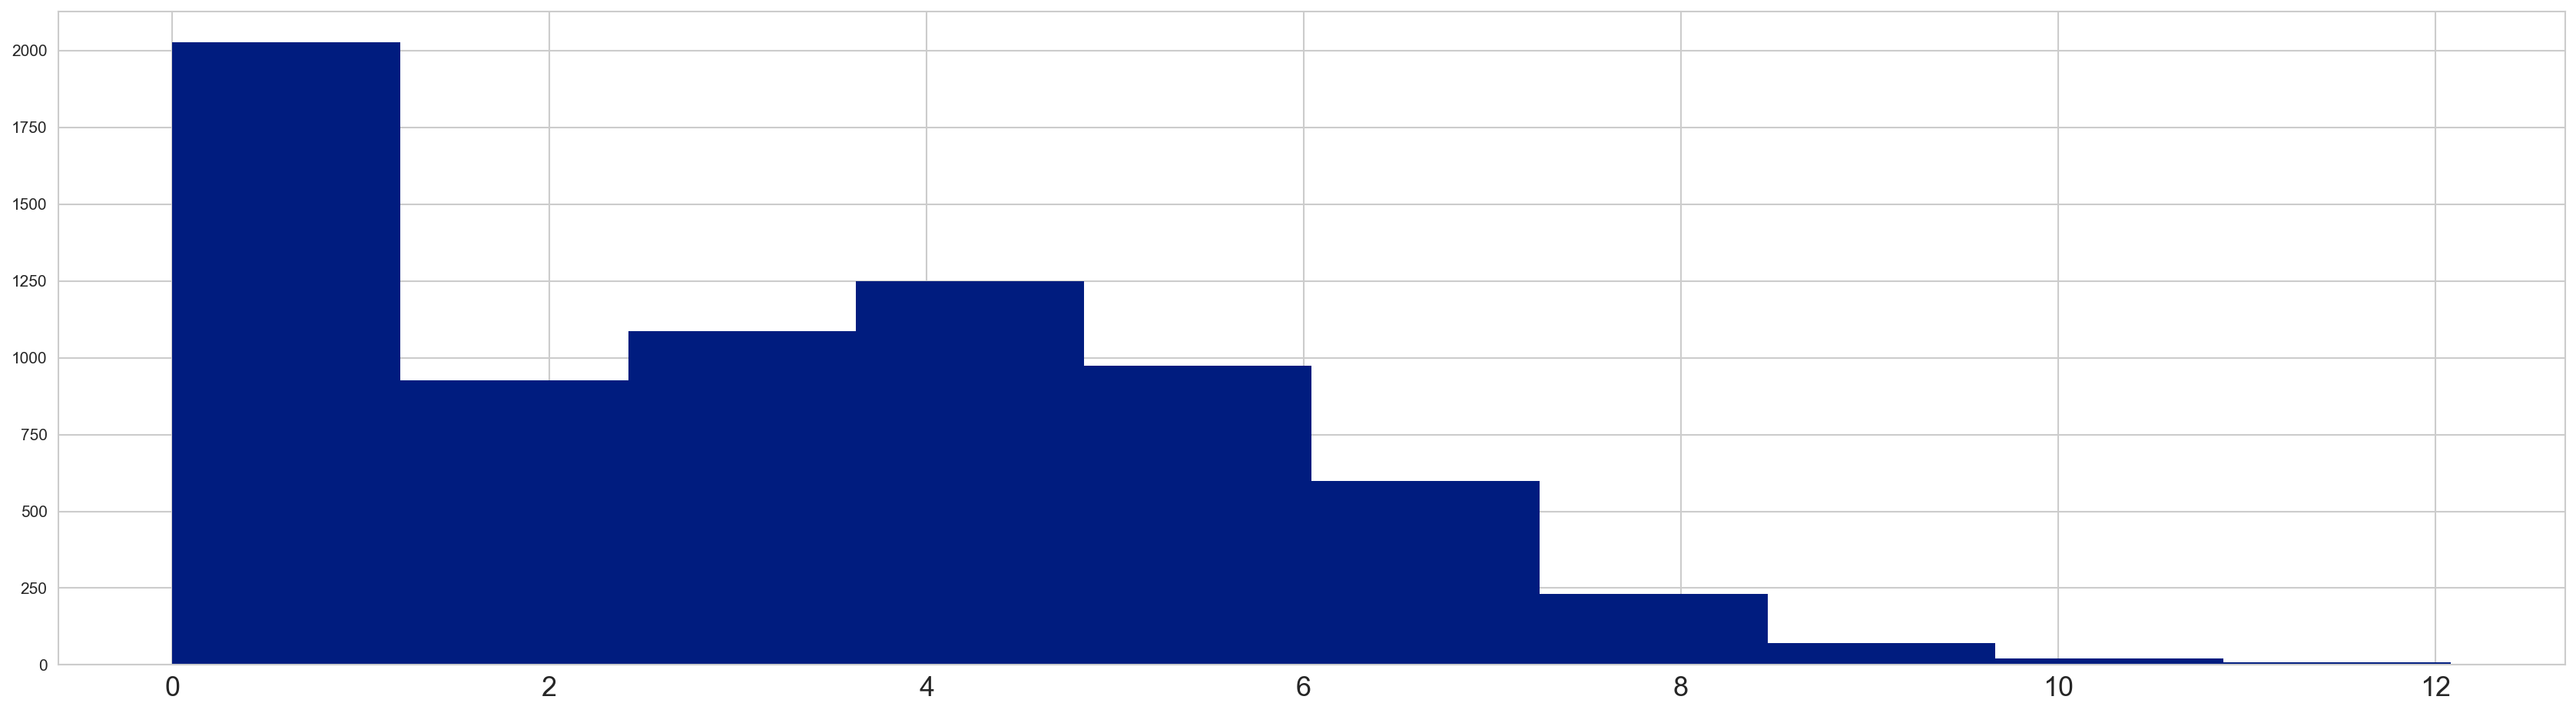

In [20]:
# Take nature log to deal with the skewness

df["rating_count_ver"] = np.log(df["rating_count_ver"]+1)
plt.hist('rating_count_ver' , data=df , bins=10)
plt.show()

4+     4433
12+    1155
9+      987
17+     622
Name: cont_rating, dtype: int64


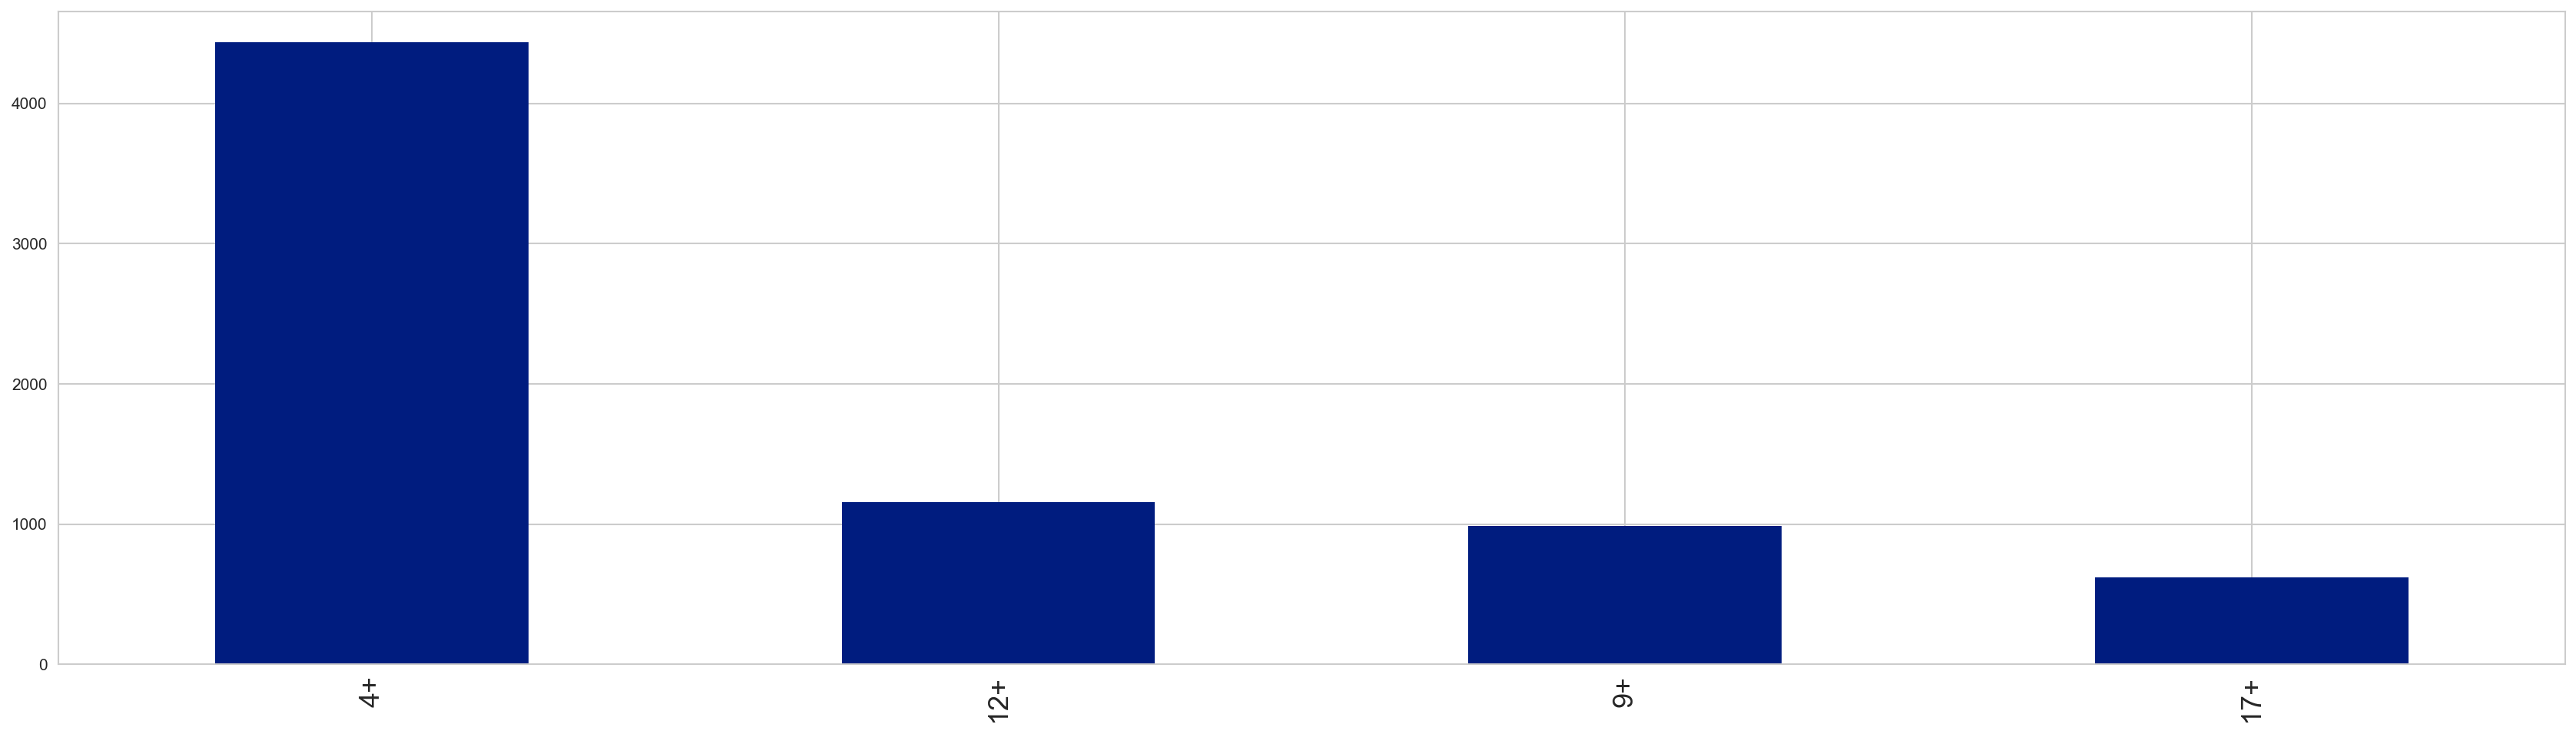

In [21]:
# 5 count_rating
df['cont_rating'].value_counts()
print(df['cont_rating'].value_counts())
df['cont_rating'].value_counts().plot.bar()
plt.show()
# Change to dummy variables

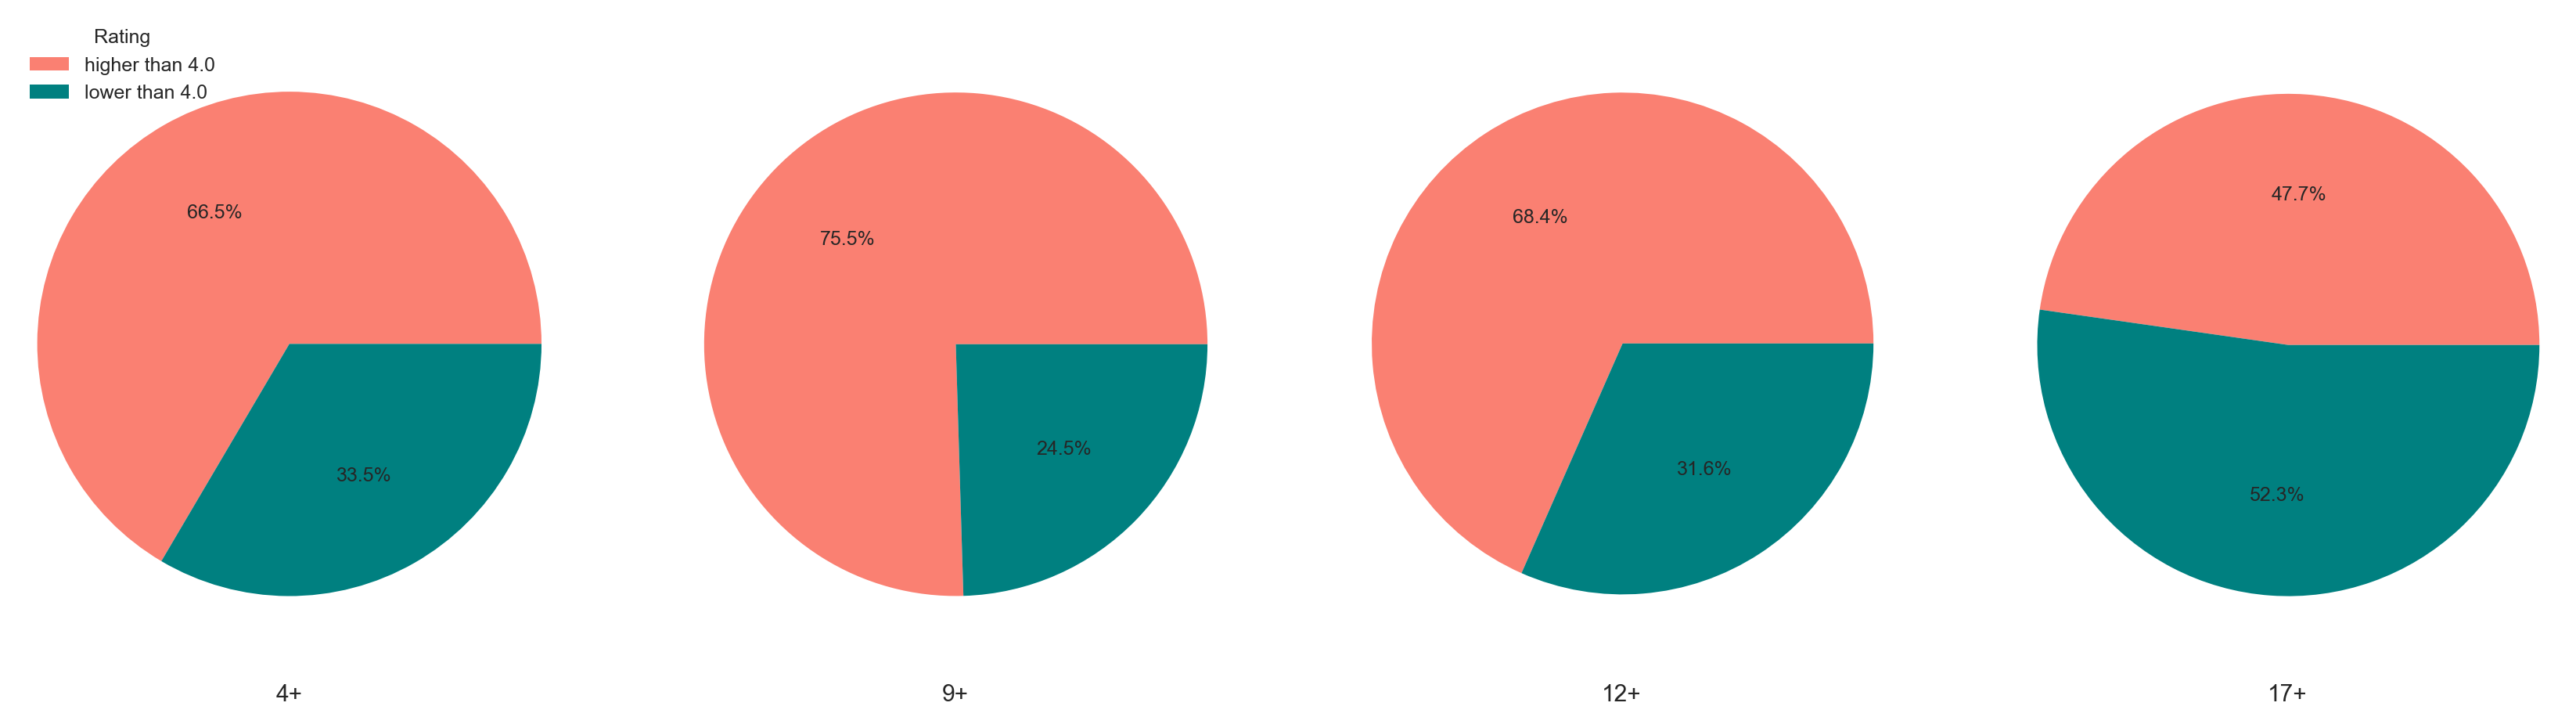

In [22]:
#pie chart for cont_rating versus user_rating
four = df[df['cont_rating']=='4+']
nine = df[df['cont_rating']=='9+']
twelve = df[df['cont_rating']=='12+']
seventeen = df[df['cont_rating']=='17+']

f_hr = four[four['user_rating']>=4.0]
f_lr = four[four['user_rating']<4.0]
size_f = [len(f_hr),len(f_lr)]

n_hr = nine[nine['user_rating']>=4.0]
n_lr = nine[nine['user_rating']<4.0]
size_n = [len(n_hr),len(n_lr)]

t_hr = twelve[twelve['user_rating']>=4.0]
t_lr = twelve[twelve['user_rating']<4.0]
size_t = [len(t_hr),len(t_lr)]

s_hr = seventeen[seventeen['user_rating']>=4.0]
s_lr = seventeen[seventeen['user_rating']<4.0]
size_s = [len(s_hr),len(s_lr)]

plt.subplot(1,4,1)
label = ['higher than 4.0','lower than 4.0']
colors = ['salmon','teal']
plt.pie(size_f,colors=colors,autopct='%1.1f%%')
plt.axis('equal')
plt.xlabel('4+')
plt.legend(label,title='Rating',loc=2,prop={'size': 12}) 

plt.subplot(1,4,2)
label = ['higher than 4.0','lower than 4.0']
colors = ['salmon','teal']
plt.pie(size_n,colors=colors,autopct='%1.1f%%')
plt.axis('equal')
plt.xlabel('9+')

plt.subplot(1,4,3)
label = ['higher than 4.0','lower than 4.0']
colors = ['salmon','teal']
plt.pie(size_t,colors=colors,autopct='%1.1f%%')
plt.axis('equal')
plt.xlabel('12+')

plt.subplot(1,4,4)
label = ['higher than 4.0','lower than 4.0']
colors = ['salmon','teal']
plt.pie(size_s,colors=colors,autopct='%1.1f%%')
plt.axis('equal')
plt.xlabel('17+')

plt.show()

Games                3862
Entertainment         535
Education             453
Photo & Video         349
Utilities             248
Health & Fitness      180
Productivity          178
Social Networking     167
Lifestyle             144
Music                 138
Shopping              122
Sports                114
Book                  112
Finance               104
Travel                 81
News                   75
Weather                72
Reference              64
Food & Drink           63
Business               57
Navigation             46
Medical                23
Catalogs               10
Name: prime_genre, dtype: int64


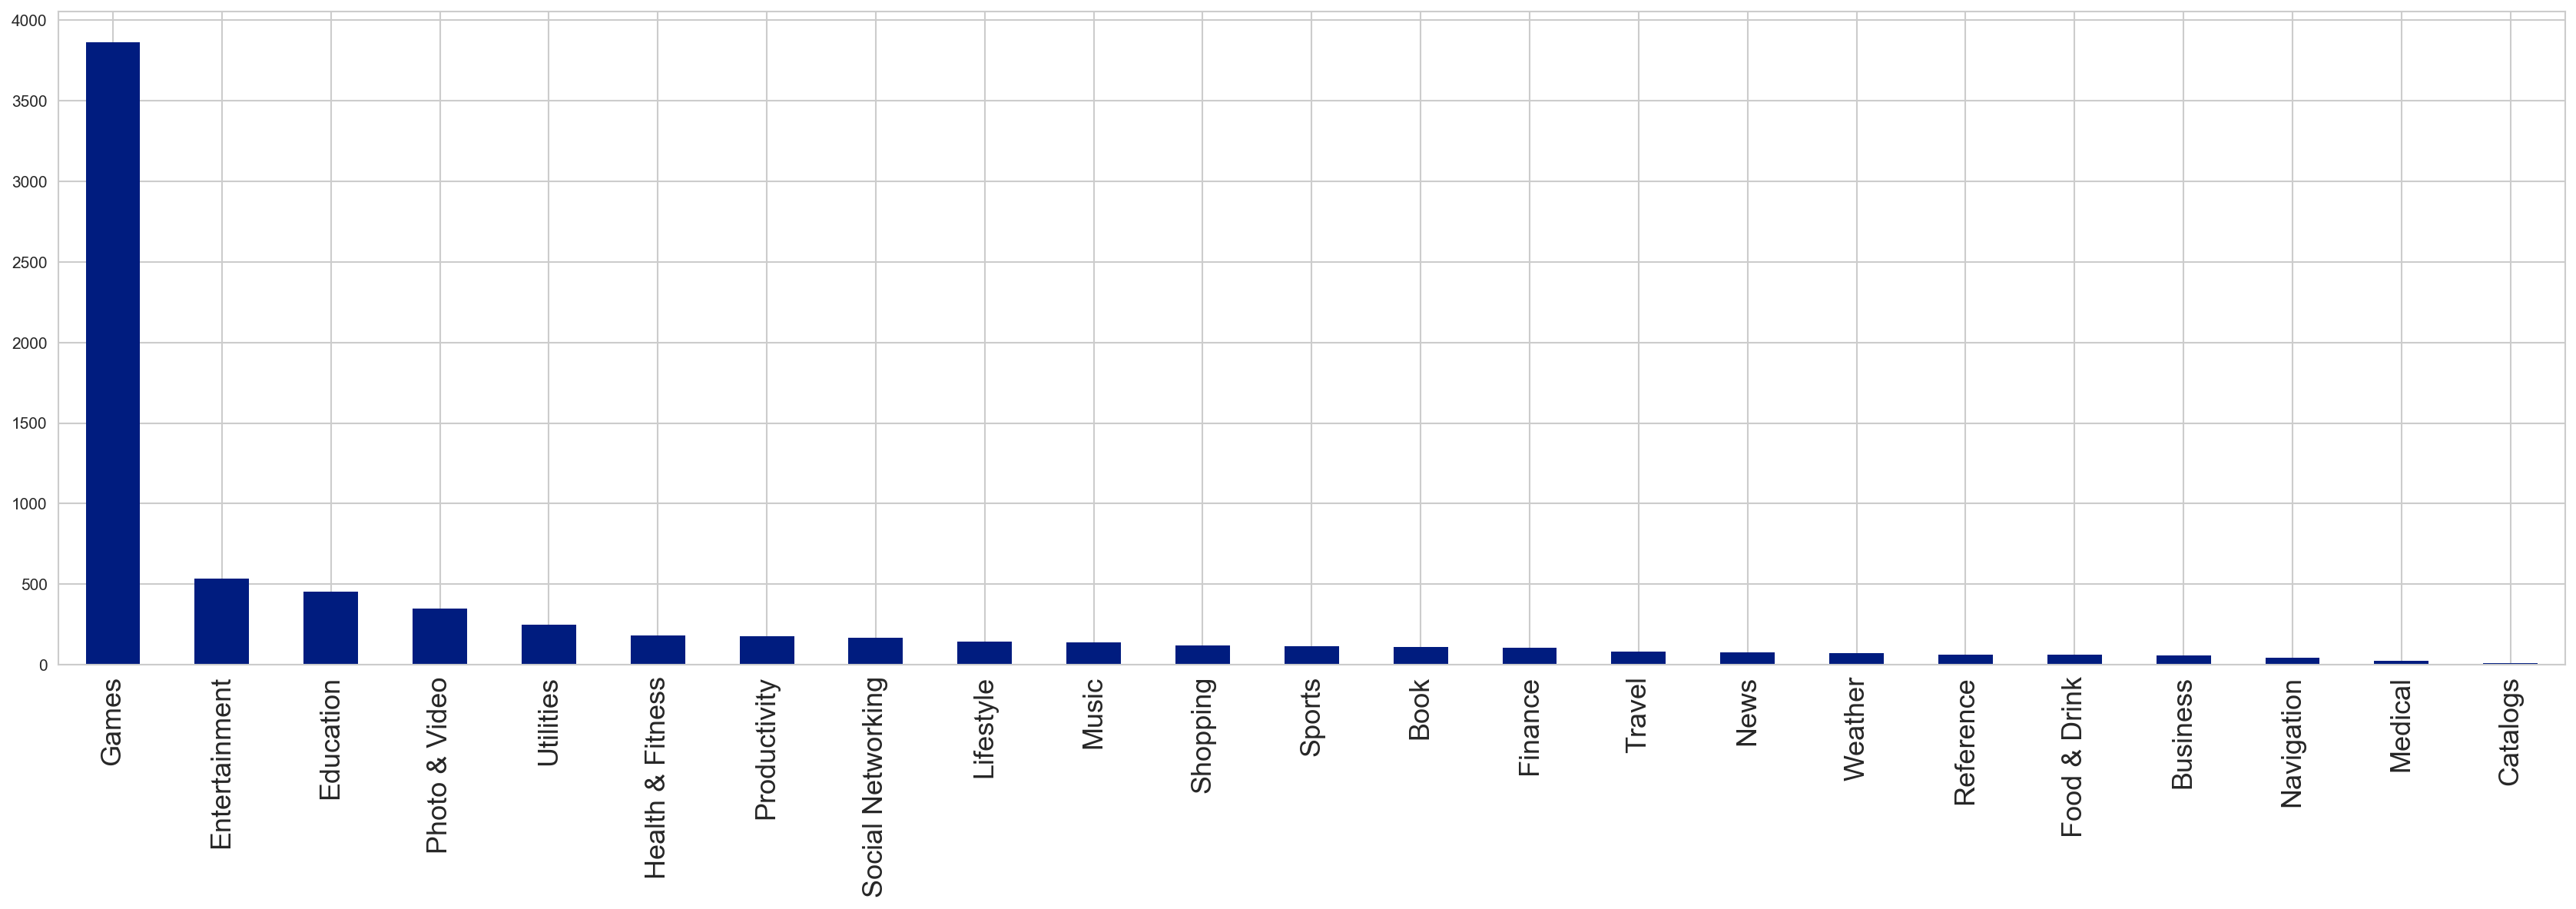

In [23]:
# 6 prime_genre
df['prime_genre'].value_counts()
print(df['prime_genre'].value_counts())
df['prime_genre'].value_counts().plot.bar()
plt.show()
# Change to dummy variables

/Users/safalmehta/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


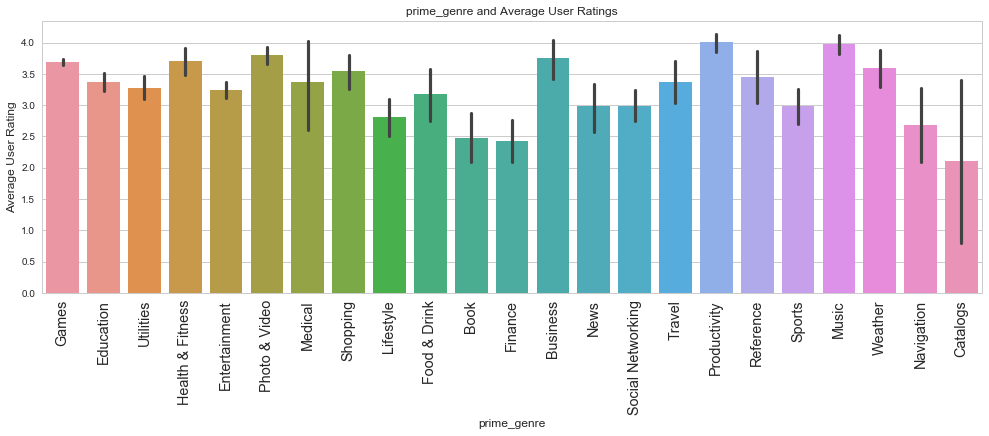

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
user_rating = []
for x in df.prime_genre.unique():
    user_rating.append(df[df.prime_genre == x].user_rating.mean())

# DataFrame for category and user rating
rate = pd.DataFrame({'prime_genre': df.prime_genre,'user_rating':df.user_rating})
# set order basis on user rating
new_index = (rate['user_rating'].sort_values(ascending=False)).index.values
# for Valid indices
sorted_df_rating = rate.reindex(new_index)
#sorted_df_rating



plt.figure(figsize=(15,5))
sns.barplot(x=sorted_df_rating['prime_genre'], y=sorted_df_rating['user_rating'])
plt.xticks(rotation= 90)
plt.xlabel('prime_genre')
plt.ylabel('Average User Rating')
plt.title('prime_genre and Average User Ratings')
plt.show()

In [25]:
#visualization for prime_genre divided into 5 groups
p_g = df[['prime_genre','price','user_rating']]
s = p_g.prime_genre.value_counts().index[:4]
def categ(x):
    if x in s:
        return x
    else : 
        return "Others"
p_g['broad_genre']= p_g.prime_genre.apply(lambda x : categ(x))

p_g.head()

/Users/safalmehta/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,prime_genre,price,user_rating,broad_genre
0,Games,0,4.0,Games
1,Productivity,1,4.0,Others
2,Weather,1,3.5,Others
3,Shopping,1,4.0,Others
4,Reference,1,4.5,Others


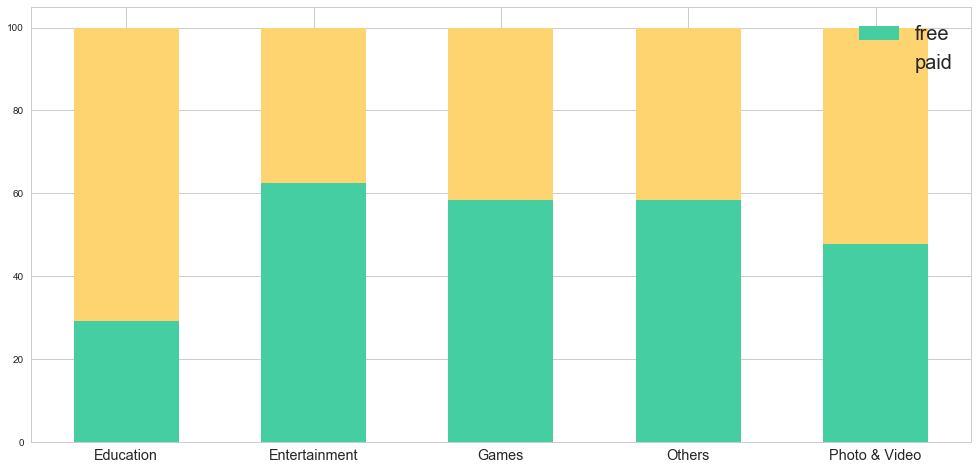

In [26]:
free = p_g[p_g.price==1].broad_genre.value_counts().sort_index().to_frame()
paid = p_g[p_g.price==0].broad_genre.value_counts().sort_index().to_frame()
total = p_g.broad_genre.value_counts().sort_index().to_frame()
free.columns=['free']
paid.columns=['paid']
total.columns=['total']
dist = free.join(paid).join(total)
dist ['paid_per'] = dist.paid*100/dist.total
dist ['free_per'] = dist.free*100/dist.total

list_free= dist.free_per.tolist()
tuple_free = tuple(list_free)
tuple_paidapps = tuple(dist.paid_per.tolist())

plt.figure(figsize=(15,8))
N=5
ind = np.arange(N)    # the x locations for the groups
width =0.56   # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, tuple_free, width, color='#45cea2')
p2 = plt.bar(ind, tuple_paidapps, width,bottom=tuple_free,color='#fdd470')
plt.xticks(ind,tuple(dist.index.tolist() ))
plt.legend((p1[0], p2[0]), ('free', 'paid'))
plt.show()

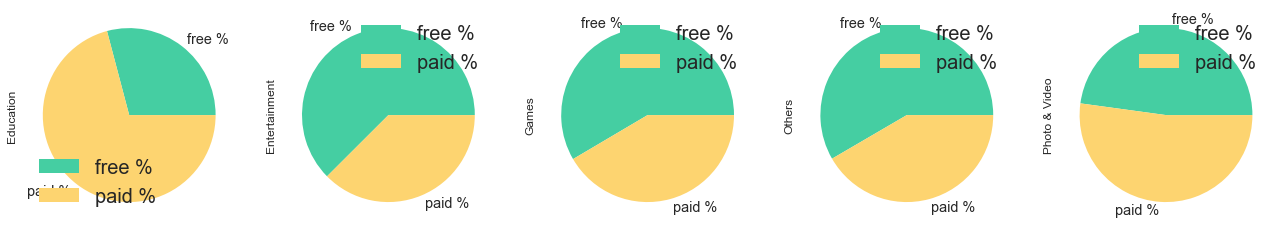

In [27]:
# for pie chart
pies = dist[['free_per','paid_per']]
pies.columns=['free %','paid %']
plt.show()

plt.figure(figsize=(15,8))
pies.T.plot.pie(subplots=True,figsize=(20,4),colors=['#45cea2','#fdd470'])
plt.show()

/Users/safalmehta/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/safalmehta/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


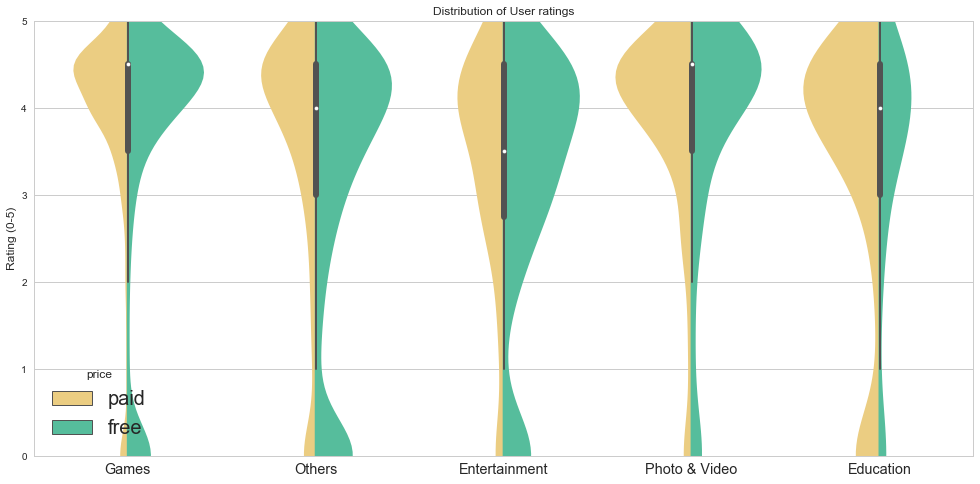

In [28]:
freeornot = {0:'paid', 1:'free'}
p_g['price'] = p_g['price'].map(freeornot)
plt.figure(figsize=(15,8))
#plt.style.use('fast')
plt.ylim([0,5])
plt.title("Distribution of User ratings")
sns.violinplot(data=p_g, y ='user_rating',x='broad_genre',hue='price',vertical=True,kde=False,split=True ,linewidth=2,scale ='count', palette=['#fdd470','#45cea2'])
plt.xlabel(" ")
plt.ylabel("Rating (0-5)")

plt.show()

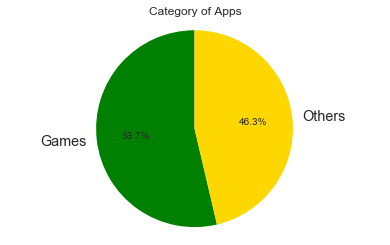

In [29]:
#pie chart for apps category decided into Games/Others
df['prime_genre'] = ['Games' if x == 'Games' else "Others" for x in df['prime_genre']]

category = list(df['prime_genre'])
game = category.count('Games')
other = category.count('Others')
sizes = [game,other]
labels = ['Games','Others']
colors = ['green','gold']
plt.title('Category of Apps')
plt.pie(sizes, labels=labels, colors=colors,autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.show()

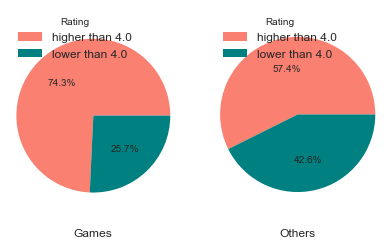

In [30]:
#pie chart of category versus user_rating
games = df[df['prime_genre']=='Games']
others = df[df['prime_genre']=='Others']

plt.subplot(1,2,1)
g_hr = games[games['user_rating']>=4.0]
g_lr = games[games['user_rating']<4.0]
size_g = [len(g_hr),len(g_lr)]
label = ['higher than 4.0','lower than 4.0']
colors = ['salmon','teal']
plt.pie(size_g,colors=colors,autopct='%1.1f%%')
plt.axis('equal')
plt.xlabel('Games')
plt.legend(label,title='Rating',loc=2,prop={'size': 12}) 

plt.subplot(1,2,2)
o_hr = others[others['user_rating']>=4.0]
o_lr = others[others['user_rating']<4.0]
size_o = [len(o_hr),len(o_lr)]
label = ['higher than 4.0','lower than 4.0']
colors = ['salmon','teal']
plt.pie(size_o,colors=colors,autopct='%1.1f%%')
plt.axis('equal')
plt.xlabel('Others')
plt.legend(label,title='Rating',loc=2,prop={'size': 12}) 

plt.show()

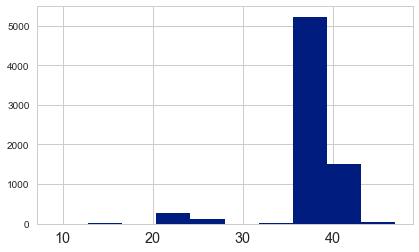

In [31]:
# 7 sup_device
plt.hist('sup_devices.num' , data=df , bins=10)

plt.show()
# Take nature log to deal with the skewness

In [32]:
# Take nature log to deal with the skewness
df["sup_devices.num"] = np.log(df["sup_devices.num"]+1)


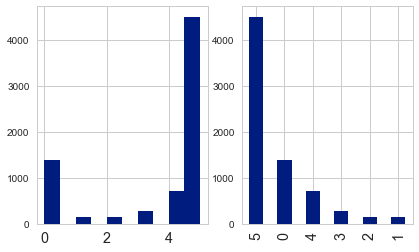

In [33]:
# 8 ipadSc_urls.num: screenshot display
plt.subplot(1,2,1)
plt.hist('ipadSc_urls.num' , data=df , bins=10)
plt.subplot(1,2,2)
df['ipadSc_urls.num'].value_counts().plot.bar()
plt.show()
# Take nature log to deal with the skewness

In [34]:
# Take nature log to deal with the skewness
df["ipadSc_urls.num"] = np.log(df["ipadSc_urls.num"]+1)


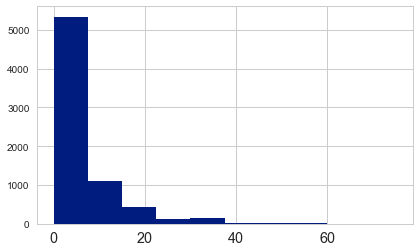

In [35]:
# 9 lang.num: number of language supported
plt.hist('lang.num' , data=df , bins=10)

plt.show()

In [36]:
# Take nature log to deal with the skewness
df["lang.num"] = np.log(df["lang.num"]+1)


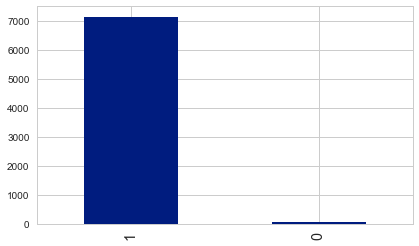

In [37]:
# 10 vpp_lic
df['vpp_lic'].value_counts().plot.bar()
plt.show()
# Change to dummy variable

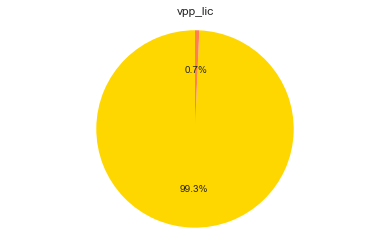

In [38]:
#pie chart for vpp_lic
vpp = list(df['vpp_lic'])
isvpp = vpp.count(1)
notvpp = vpp.count(0)
sizes = [isvpp,notvpp]
colors = ['gold','coral']
plt.title('vpp_lic')
plt.pie(sizes, colors=colors,autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.show()

In [39]:
X = df.drop("user_rating", 1)
y = df.user_rating

In [40]:
# Change price, rating_count_ver, prime_genre, vpp_lic to dunny variables
todummy_list = ["price","cont_rating","prime_genre","vpp_lic"]
def dummy_df(df, todummy_list):
    for x in todummy_list:
        dummies = pd.get_dummies(df[x], prefix=x, dummy_na=False)
        df = df.drop(x, 1)
        df = pd.concat([df, dummies], axis=1)
    return df

In [41]:
X = dummy_df(X, todummy_list)
print(X.head(5))

   size_bytes  rating_count_tot  rating_count_ver  sup_devices.num  \
0   18.428532          9.966134          3.295837         3.663562   
1   18.881761         11.989569          3.295837         3.637586   
2   18.425907         12.147299          7.945555         3.637586   
3   18.671533         12.477023          6.476972         3.637586   
4   18.345681         13.801332          8.579417         3.637586   

   ipadSc_urls.num  lang.num  price_0  price_1  cont_rating_12+  \
0         1.791759  2.397895        1        0                0   
1         1.791759  3.178054        0        1                0   
2         1.791759  1.386294        0        1                0   
3         1.791759  2.302585        0        1                1   
4         1.791759  3.828641        0        1                0   

   cont_rating_17+  cont_rating_4+  cont_rating_9+  prime_genre_Games  \
0                0               1               0                  1   
1                0            

### Divide the data into training and test

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=66)

In [47]:
lr_X_train = X_train
lr_X_test = X_test

In [48]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

/Users/safalmehta/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/safalmehta/anaconda/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/Users/safalmehta/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


### Random Forest

In [49]:
# Random Forest
clf_rf = RandomForestRegressor()
clf_rf.fit(X_train , y_train)
accuracies = cross_val_score(estimator = clf_rf, X = X_train, y = y_train, cv = 10,verbose = 1)

rf_feature_importances = pd.DataFrame(clf_rf.feature_importances_,index = lr_X_train.columns,columns=['importance']).sort_values('importance',ascending=False)
print('')
print('Feature Importance')
print(rf_feature_importances)

y_pred = clf_rf.predict(X_test)
print('')
print('###### Random Forest ######')
print('Score : %.4f' % clf_rf.score(X_test, y_test))
print(accuracies)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)**0.5
r2 = r2_score(y_test, y_pred)

print('')
print('MSE    : %0.2f ' % mse)
print('MAE    : %0.2f ' % mae)
print('RMSE   : %0.2f ' % rmse)
print('R2     : %0.2f ' % r2)

/Users/safalmehta/anaconda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.



Feature Importance
                    importance
rating_count_tot      0.852928
size_bytes            0.052999
rating_count_ver      0.031895
lang.num              0.013971
ipadSc_urls.num       0.012200
sup_devices.num       0.011978
cont_rating_4+        0.003349
price_0               0.003232
prime_genre_Others    0.002980
cont_rating_12+       0.002977
prime_genre_Games     0.002866
cont_rating_17+       0.002690
price_1               0.002618
cont_rating_9+        0.002481
vpp_lic_1             0.000427
vpp_lic_0             0.000408

###### Random Forest ######
Score : 0.8104
[0.75073358 0.78158719 0.79764299 0.81268999 0.81408057 0.76609878
 0.84391934 0.83882234 0.85405593 0.79273369]

MSE    : 0.44 
MAE    : 0.44 
RMSE   : 0.66 
R2     : 0.81 


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    1.6s finished


### Neural Network

In [50]:
# Neural Network
clf_nn = MLPRegressor()
clf_nn.fit(X_train , y_train)
accuracies = cross_val_score(estimator = clf_nn, X = X_train, y = y_train, cv = 10,verbose = 1)

y_pred = clf_nn.predict(X_test)
print('')
print('###### Neural Network ######')
print('Score : %.4f' % clf_nn.score(X_test, y_test))
print(accuracies)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)**0.5
r2 = r2_score(y_test, y_pred)

print('')
print('MSE    : %0.2f ' % mse)
print('MAE    : %0.2f ' % mae)
print('RMSE   : %0.2f ' % rmse)
print('R2     : %0.2f ' % r2)

/Users/safalmehta/anaconda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/Users/safalmehta/anaconda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/safalmehta/anaconda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/safalmehta/anaconda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarni


###### Neural Network ######
Score : 0.8358
[0.78661092 0.79556223 0.81239727 0.83054382 0.8148878  0.77571755
 0.84858954 0.833456   0.85559738 0.7930609 ]

MSE    : 0.38 
MAE    : 0.43 
RMSE   : 0.62 
R2     : 0.84 


/Users/safalmehta/anaconda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   51.1s finished


### AdaBoost

In [51]:
# AdaBoost
clf_ada = AdaBoostRegressor(n_estimators=1000)
clf_ada.fit(X_train , y_train)
accuracies = cross_val_score(estimator = clf_ada, X = X_train, y = y_train, cv = 10,verbose = 1)

ada_feature_importances = pd.DataFrame(clf_ada.feature_importances_,index = lr_X_train.columns,columns=['importance']).sort_values('importance',ascending=False)
print('')
print('Feature Importance')
print(ada_feature_importances)

y_pred = clf_ada.predict(X_test)
print('')
print('###### AdaBoost Regression ######')
print('Score : %.4f' % clf_ada.score(X_test, y_test))
print(accuracies)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)**0.5
r2 = r2_score(y_test, y_pred)

print('')
print('MSE    : %0.2f ' % mse)
print('MAE    : %0.2f ' % mae)
print('RMSE   : %0.2f ' % rmse)
print('R2     : %0.2f ' % r2)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.



Feature Importance
                    importance
rating_count_tot      0.917060
ipadSc_urls.num       0.019535
size_bytes            0.018005
rating_count_ver      0.017853
cont_rating_9+        0.011835
prime_genre_Others    0.009491
lang.num              0.005021
prime_genre_Games     0.001200
sup_devices.num       0.000000
price_0               0.000000
price_1               0.000000
cont_rating_12+       0.000000
cont_rating_17+       0.000000
cont_rating_4+        0.000000
vpp_lic_0             0.000000
vpp_lic_1             0.000000

###### AdaBoost Regression ######
Score : 0.8292
[0.77677758 0.79126327 0.82142988 0.82795099 0.82980067 0.76756956
 0.84423194 0.83293579 0.84941763 0.77875671]

MSE    : 0.40 
MAE    : 0.45 
RMSE   : 0.63 
R2     : 0.83 


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.7s finished


### Gradient Boosting

In [52]:
# GradientBoosting
clf_gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1,max_depth=1, random_state=0, loss='ls',verbose = 1)
clf_gbr.fit(X_train , y_train)
accuracies = cross_val_score(estimator = clf_gbr, X = X_train, y = y_train, cv = 10,verbose = 1)

gbr_feature_importances = pd.DataFrame(clf_gbr.feature_importances_,index = lr_X_train.columns,columns=['importance']).sort_values('importance',ascending=False)
print('')
print('Feature Importance')
print(gbr_feature_importances)

y_pred = clf_gbr.predict(X_test)
print('')
print('###### Gradient Boosting Regression #######')
print('Score : %.4f' % clf_gbr.score(X_test, y_test))
print(accuracies)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)**0.5
r2 = r2_score(y_test, y_pred)

print('')
print('MSE    : %0.2f ' % mse)
print('MAE    : %0.2f ' % mae)
print('RMSE   : %0.2f ' % rmse)
print('R2     : %0.2f ' % r2)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


      Iter       Train Loss   Remaining Time 
         1           1.9508            0.12s
         2           1.6678            0.10s
         3           1.4386            0.12s
         4           1.2529            0.12s
         5           1.1025            0.11s
         6           0.9807            0.11s
         7           0.8821            0.10s
         8           0.8021            0.10s
         9           0.7374            0.10s
        10           0.6850            0.10s
        20           0.4840            0.08s
        30           0.4389            0.07s
        40           0.4204            0.06s
        50           0.4104            0.05s
        60           0.4046            0.04s
        70           0.4009            0.03s
        80           0.3984            0.02s
        90           0.3967            0.01s
       100           0.3954            0.00s
      Iter       Train Loss   Remaining Time 
         1           1.9753            0.12s
        

         6           0.9826            0.12s
         7           0.8854            0.12s
         8           0.8066            0.12s
         9           0.7428            0.12s
        10           0.6912            0.12s
        20           0.4928            0.09s
        30           0.4476            0.07s
        40           0.4289            0.06s
        50           0.4187            0.05s
        60           0.4126            0.04s
        70           0.4087            0.03s
        80           0.4060            0.02s
        90           0.4042            0.01s
       100           0.4028            0.00s
      Iter       Train Loss   Remaining Time 
         1           1.9751            0.16s
         2           1.6873            0.14s
         3           1.4543            0.13s
         4           1.2655            0.13s
         5           1.1126            0.13s
         6           0.9887            0.14s
         7           0.8884            0.15s
         

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    1.2s finished


### Stacked Model

In [53]:
# Stacked Model
from mlxtend.regressor import StackingRegressor
stregr = StackingRegressor(regressors=[clf_gbr, clf_ada], 
                           meta_regressor=clf_nn)
stregr.fit(X_train , y_train)
accuracies = cross_val_score(estimator = stregr, X = X_train, y = y_train, cv = 10,verbose = 1)

y_pred = stregr.predict(X_test)
print('')
print('###### Neural Network ######')
print('Score : %.4f' % stregr.score(X_test, y_test))
print(accuracies)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)**0.5
r2 = r2_score(y_test, y_pred)

print('')
print('MSE    : %0.2f ' % mse)
print('MAE    : %0.2f ' % mae)
print('RMSE   : %0.2f ' % rmse)
print('R2     : %0.2f ' % r2)

      Iter       Train Loss   Remaining Time 
         1           1.9508            0.15s
         2           1.6678            0.18s
         3           1.4386            0.18s
         4           1.2529            0.22s
         5           1.1025            0.21s
         6           0.9807            0.19s
         7           0.8821            0.18s
         8           0.8021            0.17s
         9           0.7374            0.16s
        10           0.6850            0.15s
        20           0.4840            0.10s
        30           0.4389            0.08s
        40           0.4204            0.07s
        50           0.4104            0.05s
        60           0.4046            0.04s
        70           0.4009            0.03s
        80           0.3984            0.02s
        90           0.3967            0.01s
       100           0.3954            0.00s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


      Iter       Train Loss   Remaining Time 
         1           1.9753            0.12s
         2           1.6876            0.11s
         3           1.4547            0.11s
         4           1.2660            0.10s
         5           1.1131            0.10s
         6           0.9893            0.10s
         7           0.8890            0.10s
         8           0.8078            0.10s
         9           0.7420            0.10s
        10           0.6887            0.10s
        20           0.4839            0.08s
        30           0.4378            0.07s
        40           0.4182            0.06s
        50           0.4079            0.05s
        60           0.4018            0.04s
        70           0.3980            0.03s
        80           0.3955            0.02s
        90           0.3938            0.01s
       100           0.3925            0.00s
      Iter       Train Loss   Remaining Time 
         1           1.9616            0.12s
        


###### Neural Network ######
Score : 0.8343
[0.78976035 0.80925443 0.82261044 0.83476361 0.8380882  0.78098772
 0.85855669 0.84197136 0.86904361 0.78317853]

MSE    : 0.38 
MAE    : 0.41 
RMSE   : 0.62 
R2     : 0.83 


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    6.8s finished


### Multiple linear Regression

In [54]:
###Multiple Linear Regression 
##with OLS(ordinary least squares)
import statsmodels.api as sm
lm_X_train = sm.add_constant(lr_X_train)
model = sm.OLS(y_train, lm_X_train).fit()
print(model.summary())

#prediction
lm_X_test = sm.add_constant(lr_X_test)
y_pred = model.predict(lm_X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)**0.5
r2 = r2_score(y_test, y_pred)

print('')
print('Prediction accuracy')
print('MSE    : %0.2f ' % mse)
print('MAE    : %0.2f ' % mae)
print('RMSE   : %0.2f ' % rmse)
print('R2     : %0.2f ' % r2)

##with SCIKIT-LEARN
from sklearn.linear_model import LinearRegression

lm2 = LinearRegression()
model2 = lm2.fit(lr_X_train,y_train)

print('')
print('')
print('Linear Regression with SCIKIT-LEARN')
print('')
print('The intercept of model:', model2.intercept_)
print('The coefficients of model:', model2.coef_)
print('The accuracy of the model:', model2.score(lr_X_train,y_train))

y_pred2 = model2.predict(lr_X_test)

mse = mean_squared_error(y_test, y_pred2)
mae = mean_absolute_error(y_test, y_pred2)
rmse = mean_squared_error(y_test, y_pred2)**0.5
r2 = r2_score(y_test, y_pred2)

print('')
print('Prediction accuracy')
print('MSE    : %0.2f ' % mse)
print('MAE    : %0.2f ' % mae)
print('RMSE   : %0.2f ' % rmse)
print('R2     : %0.2f ' % r2)

/Users/safalmehta/anaconda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


                            OLS Regression Results                            
Dep. Variable:            user_rating   R-squared:                       0.491
Model:                            OLS   Adj. R-squared:                  0.490
Method:                 Least Squares   F-statistic:                     462.2
Date:                Fri, 14 Dec 2018   Prob (F-statistic):               0.00
Time:                        20:29:17   Log-Likelihood:                -8621.2
No. Observations:                5757   AIC:                         1.727e+04
Df Residuals:                    5744   BIC:                         1.735e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.3854      0

/Users/safalmehta/anaconda/lib/python3.6/site-packages/sklearn/linear_model/base.py:485: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)


### Multiple Logistic Regression

In [55]:
###Multiple Logistic Regression
#turn target variable type from numeric to categorical variable
lr_y_train = y_train.astype('str')
lr_y_test = y_test.astype('str')

from sklearn.linear_model import LogisticRegression
from sklearn import metrics

lr = LogisticRegression()
lr.fit(lr_X_train, lr_y_train)
#Train multinomial logistic regression model
mul_lr = LogisticRegression(multi_class='multinomial', solver='newton-cg').fit(lr_X_train, lr_y_train)

print ("Logistic regression Train Accuracy: ", metrics.accuracy_score(lr_y_train,lr.predict(lr_X_train)))
print ("Logistic regression Test Accuracy: ", metrics.accuracy_score(lr_y_test,lr.predict(lr_X_test)))
print('')
print ("Multinomial Logistic regression Train Accuracy: ", metrics.accuracy_score(lr_y_train, mul_lr.predict(lr_X_train)))
print ("Multinomial Logistic regression Test Accuracy: ", metrics.accuracy_score(lr_y_test, mul_lr.predict(lr_X_test)))

/Users/safalmehta/anaconda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/safalmehta/anaconda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Logistic regression Train Accuracy:  0.5028660760812923
Logistic regression Test Accuracy:  0.4847222222222222

Multinomial Logistic regression Train Accuracy:  0.5002605523710266
Multinomial Logistic regression Test Accuracy:  0.4930555555555556
